<a href="https://colab.research.google.com/github/WesDavi/Analise_Campeonato_Brasileiro/blob/main/Analise_Campeonato_Brasileiro_Ciencia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <center> Ciências de dados </center> </h1>
<h2> Análise dos campeões de futebol brasileiro - Campeonato Brasileiro (2003 à 2022) </center> </h2>
<h3> <center> FACULDADE DE ENGENHARIA DE COMPUTAÇÃO - 2018 </center> </h3>
<h4> <center> ALUNOS: </center> </h4>

<center> ROQUEUDISON SOBRINHO </center>
<center> WESLEY DAVID LIMA </center>

#### PASSO A PASSO DO PROCESSO DE CIÊNCIA DE DADOS DO DATASET
- IMPORTAR AS BIBLIOTECAS NECESSÁRIAS
- FAZER PRÉ-PROCESSAMENTO DO DATASET(exclusão de dados nulos, miniminar colunas, interpolação)
- PROCESSO DE EXPLORAÇÃO DE DADOS DENTRO DO DATASET
- HISTORYTELING DOS DADOS / DATA VISUALIZATION DOS DADOS OBTIDOS

##### Importação das bibliotecas necessárias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt

#### PROCESSO DE PRÉ-PROCESSAMENTO DOS DADOS
- Utilizando a função pd.read_csv para ler nosso arquivo .CSV
- Renomeando algumas colunas para melhor visualização e excluindo-as
- Verificando a existência de dados nulos
- Entendendo os tipos das colunas

In [ ]:
dados = pd.read_csv('archive/campeonato-brasileiro-full.csv', sep=',')
dados.head()

ID  rodata       data   hora       mandante    visitante formacao_mandante  \
0   1       1  29/3/2003  16:00        Guarani        Vasco               NaN   
1   2       1  29/3/2003  16:00   Athletico-PR       Gremio               NaN   
2   3       1  30/3/2003  16:00       Flamengo     Coritiba               NaN   
3   4       1  30/3/2003  16:00          Goias     Paysandu               NaN   
4   5       1  30/3/2003  16:00  Internacional  Ponte Preta               NaN   

  formacao_visitante tecnico_mandante tecnico_visitante      vencedor  \
0                NaN              NaN               NaN       Guarani   
1                NaN              NaN               NaN  Athletico-PR   
2                NaN              NaN               NaN             -   
3                NaN              NaN               NaN             -   
4                NaN              NaN               NaN             -   

               arena  mandante_Placar  visitante_Placar mandante_Estado  \
0     Brinco de Ouro                4                 2              SP   
1   Arena da Baixada                2                 0              PR   
2           Maracanã                1                 1              RJ   
3      Serra Dourada                2                 2              GO   
4          Beira Rio                1                 1              RS   

  visitante_Estado  
0               RJ  
1               RS  
2               PR  
3               PA  
4               SP

##### Escolhendo colunas necessárias para nossa análise


In [ ]:
dados = dados[['rodata', 'data', 'mandante', 'visitante', 'vencedor', 'mandante_Placar', 'visitante_Placar']]
dados.rename(columns = {'rodata':'Rodada',
                        'data':'Data',
                        'mandante':'Mandante',
                        'visitante':'Visitante',
                        'vencedor':'Vencedor',
                        'mandante_Placar':'Mandante_placar', 'visitante_Placar':'Visitante_placar'}, inplace = True)

##### Verificando existência de dados nulos (faltantes)

In [ ]:
dados.isnull().sum()

Rodada              0
Data                0
Mandante            0
Visitante           0
Vencedor            0
Mandante_placar     0
Visitante_placar    0
dtype: int64

##### Entendendo o tipo de dados a qual estamos trabalhando, usando a função info()

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rodada            8025 non-null   int64 
 1   Data              8025 non-null   object
 2   Mandante          8025 non-null   object
 3   Visitante         8025 non-null   object
 4   Vencedor          8025 non-null   object
 5   Mandante_placar   8025 non-null   int64 
 6   Visitante_placar  8025 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 439.0+ KB


##### Convertendo coluna data para tipo datatime para podermos manipular as datas
- Mais a frente precisaremos manipular as datas, para melhor adaptação foi utilizado pd.to_datatime() para conversão dos dados até então *strings, para timo datatime

In [ ]:
dados['Data'] = pd.to_datetime(dados['Data'])

##### Nosso dataset após esse pequeno intervalo de pré-processamento

In [ ]:
dados.head()

Rodada       Data       Mandante    Visitante      Vencedor  \
0       1 2003-03-29        Guarani        Vasco       Guarani   
1       1 2003-03-29   Athletico-PR       Gremio  Athletico-PR   
2       1 2003-03-30       Flamengo     Coritiba             -   
3       1 2003-03-30          Goias     Paysandu             -   
4       1 2003-03-30  Internacional  Ponte Preta             -   

   Mandante_placar  Visitante_placar  
0                4                 2  
1                2                 0  
2                1                 1  
3                2                 2  
4                1                 1

## Funções criadas para melhor análise e manipulações
**1º Função: year_dataset_recover(recuperar dataset do ano)**
* A função retorna um dataset filtrado por ano e recebe por parâmetro (df, initial_date):
*  df          = (tipo dataFrame) dataset a qual estaremos trabalhando e obtido pelo pd.read_csv();
* initial_date = (tipo int) recebe o ano a qual queremos trabalhar.

In [ ]:
def year_dataset_recover(df, initial_date):
    _date = initial_date+1
    initial_date = '01/01/'+str(initial_date)
    final_date = '01/01/'+str(_date)
    _data = ((df.Data >= initial_date)&(df.Data < final_date))
    return df[_data]

**2º Função: poins_table_recover(recuperar tabela de pontos)**
* A função retorna uma tabela de pontos dos times em ordem do maior pontuador ao menor pontuador e recebe por parâmetro (dataFrame):
*  dataFrame = (tipo dataframe) dataset do ano obtido pela função year_dataset_recover().

In [ ]:
def poins_table_recover(dataFrame):
    linhas = dataFrame.Mandante.unique()
    dataFrame = dataFrame.sort_values(by='Rodada', ascending=True)
    novodf = pd.DataFrame(index=linhas, columns={'pontos'})

    dfSerieHist = pd.DataFrame(index=linhas, columns=range(1, dataFrame.Rodada.max()+1))
    novodf.pontos=0

    listaVencedor = np.array(dataFrame.Vencedor)
    listaMandantes = np.array(dataFrame.Mandante)
    listaVisitante = np.array(dataFrame.Visitante)
    listaRodadas  =np.array(dataFrame.Rodada)

    primeiroIndice = dataFrame.index[0]

    for i in range(len(listaVencedor)):

        rodada = listaRodadas[i]
        if(listaMandantes[i]==listaVencedor[i]):
            novodf['pontos'][listaMandantes[i]] = novodf['pontos'][listaMandantes[i]]+3
            if(rodada==1):
                dfSerieHist[rodada][listaMandantes[i]] = 3
                dfSerieHist[rodada][listaVisitante[i]] = 0
            else:
                dfSerieHist[rodada][listaMandantes[i]] = dfSerieHist[rodada-1][listaMandantes[i]]+3
                dfSerieHist[rodada][listaVisitante[i]] = dfSerieHist[rodada-1][listaVisitante[i]]
        elif(listaVisitante[i]==listaVencedor[i]):
            novodf['pontos'][listaVisitante[i]] = novodf['pontos'][listaVisitante[i]]+3
            if(rodada==1):
                dfSerieHist[rodada][listaVisitante[i]] = 3
                dfSerieHist[rodada][listaMandantes[i]] = 0
            else:
                dfSerieHist[rodada][listaVisitante[i]] = dfSerieHist[rodada-1][listaVisitante[i]]+3
                dfSerieHist[rodada][listaMandantes[i]] = dfSerieHist[rodada-1][listaMandantes[i]]
        elif(listaVencedor[i]=='-'):
            novodf['pontos'][listaMandantes[i]] = novodf['pontos'][listaMandantes[i]]+1
            novodf['pontos'][listaVisitante[i]] = novodf['pontos'][listaVisitante[i]]+1
            if(rodada==1):
                dfSerieHist[rodada][listaMandantes[i]] = 1
                dfSerieHist[rodada][listaVisitante[i]] = 1
            else:
                dfSerieHist[rodada][listaVisitante[i]] = dfSerieHist[rodada-1][listaVisitante[i]]+1
                dfSerieHist[rodada][listaMandantes[i]] = dfSerieHist[rodada-1][listaMandantes[i]]+1
    listaRodadas = np.unique(listaRodadas)

    temporal_serie_plot(dfSerieHist, listaRodadas)

    return novodf.sort_values(by='pontos', ascending=False)

**3º Função: dataFrame_winners(dataset dos vencedores)**
* A função retorna um dataset com a gols ou pontos do time campeão e recebe por parâmetro (dataFrameAno, pointsTable, types:int):
* dataFrameAno = dataset do ano obtido pela função year_dataset_recover();
* pointsTable = Tabela de pontos já obtido pela função poins_table_recover().
* types = (tipo int) Existem 4 tipo.
* Quando types = 0 -> recebe um dataFrame com os GOLS do campeão sendo MANDANTE;
* Quando types = 1 -> recebe um dataFrame com os GOLS do campeão sendo VISITANTE;
* Quando types = 2 -> recebe um dataFrame com os PONTOS do campeão sendo MANDANTE;
* Quando types = 3 -> recebe um dataFrame com os PONTOS do campeão sendo VISITANTE;

In [ ]:
def dataFrame_winners(dataFrameAno, pointsTable, types:int):
    champion = pointsTable.index[0]
    if types == 0:
        dfWinners = dataFrameAno[['Mandante', 'Mandante_placar']][dataFrameAno['Mandante']==champion]
        return dfWinners
    elif types == 1:
        dfWinners = dataFrameAno[['Visitante', 'Visitante_placar']][dataFrameAno['Visitante']==champion]
        return dfWinners
    elif types == 2:
        dfWinners = dataFrameAno[['Mandante', 'Vencedor']][dataFrameAno['Mandante']==champion]
        return dfWinners
    elif types == 3:
        dfWinners = dataFrameAno[['Visitante', 'Vencedor']][dataFrameAno['Visitante']==champion]
        return dfWinners

**4º Função: pieChart(gráfico de pizza)**
* A função retorna um gráfico de pizza e recebe por parâmetro (x, label, title):
* ESSE GRÁFICO É UMA FORMA MAIS SIMPLES QUE PRECISAMOS ADAPTAR DURANTE O TRABALHO
* x = (tipo array-1D) é a lista de dados para visualização;
* label = descreve qual dado estaremos visualizando;
* title = define o título do gráfico

In [ ]:
def pieChart(x, label, title):
    plt.figure(figsize=(8,8))
    plt.title(title)
    plt.pie(x,
            labels=label,
            autopct='%1.1f%%',
            shadow=True)
    plt.show()

**5º Função: subPieChart(vários gráficos de pizza)**

* ESSE GRÁFICO É UMA FORMA MAIS SIMPLES QUE PRECISAMOS ADAPTAR DURANTE O TRABALHO
* A função retorna até 3 gráficos de pizza e recebe por parâmetro
* subPieChart(x,
                 y,
                 z,
                 n_rows=1,
                 n_cols=3,
                 title_x='PieChart',
                 label_x='Label1',
                 title_y='PieChart_2',
                 label_y='Label2',
                 title_z='PieChart_2',
                 label_z='Label3')):
* x = (tipo array-1D) dados do 1º gráfico;
* y = (tipo array-1D) dados do 2º gráfico;
* z = (tipo array-1D) dados do 3º gráfico;
* label = descreve qual dado estaremos visualizando (para 1º, 2º e 3º) gráficos.
* title = define o título do gráfico (para 1º, 2º e 3º) gráficos;

In [ ]:
def subPieChart(x,
                y,
                z,
                n_rows=1,
                n_cols=3,
                title_x='PieChart',
                label_x='Label1',
                title_y='PieChart_2',
                label_y='Label2',
                title_z='PieChart_2',
                label_z='Label3'):

    fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))

    ax[0].pie(x, labels=['Gols como mandante', 'Gols como visitante'], autopct=make_autopct(x), shadow=True)
    ax[0].set_title(title_x)

    ax[1].pie(y, labels=['Vitoria', 'Derrota', 'Empate'], autopct='%1.1f%%', shadow=True)
    ax[1].set_title(title_y)

    ax[2].pie(z, labels=['Vitoria', 'Derrota', 'Empate'], autopct='%1.1f%%', shadow=True)
    ax[2].set_title(title_z)
    plt.show()

**6º Função: winners_losers_or_goalless(ganhos, perdas e empates)**
* A função retorna uma lista com os ganhos, perdas e empates e recebe por parâmetro (dataFrame, pointsTable):
* dataFrameAno = dataset do ano obtido pela função year_dataset_recover();
* pointsTable = Tabela de pontos já obtido pela função poins_table_recover().

In [ ]:
def winners_losers_or_goalless(dataFrame, pointsTable):

    winner = dataFrame[dataFrame.Vencedor==pointsTable.index[0]].value_counts()
    goalless = dataFrame[dataFrame.Vencedor=='-'].value_counts()
    loser = len([k for k in dataFrame.Vencedor if (k!=tabelaPontos.index[0]) & (k!='-')])

    return [winner, loser, goalless]

**7º Função: make_autopct**
* A função retorna valores formatado para ser utilizado com os gráficos, recebe o parâmetro valores:
* values = valor a ser inserido para ;

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '({v:d})'.format(v=val)
    return my_autopct

**8º Função: temporal_serie_plot**
* A função gera um gráfico de linhas com a série temporal dos compeões de todos os anos, recebe o parâmetro valores:
* values = valor a ser inserido para ;

In [ ]:
def temporal_serie_plot(dfSerieHist, listaRodadas):
    plt.figure(figsize=(20, 10))
    plt.xlabel('Rodada')
    plt.ylabel('Pontos')
    plt.title('Série temporal dos pontos ao longo do campeonato')

    for i in dfSerieHist.index:
        listaPlot = []

        for j in dfSerieHist.columns.values:
            listaPlot.append(dfSerieHist[j][i])
        plt.plot(listaRodadas, listaPlot, label=i)

    plt.legend(loc=3)
    plt.show()

**9º Função: champion_first_turn**
* A função retorna o campeão até a metade das rodadas chamado de primeiro turno;
* recebe por parâmetro o dataframe do ano.

In [ ]:
def champion_first_turn(dataFrame):
    linhas = dataFrame.Mandante.unique()
    novodf = pd.DataFrame(index=linhas, columns={'pontos'})

    dfSerieHist = pd.DataFrame(index=linhas, columns=range(1, dataFrame.Rodada.max()+1))
    arrayRodadas = range(dataFrame.Rodada.max())
    novodf.pontos=0

    listaVencedor = np.array(dataFrame.Vencedor)
    listaMandantes = np.array(dataFrame.Mandante)
    listaVisitante = np.array(dataFrame.Visitante)
    listaRodadas  =np.array(dataFrame.Rodada)
    for i in range(len(listaVencedor)):

        if(listaRodadas[i]<listaRodadas.max()/2):

            if(listaMandantes[i]==listaVencedor[i]):
                novodf['pontos'][listaMandantes[i]] = novodf['pontos'][listaMandantes[i]]+3


            elif(listaVisitante[i]==listaVencedor[i]):
                novodf['pontos'][listaVisitante[i]] = novodf['pontos'][listaVisitante[i]]+3


            elif(listaVencedor[i]=='-'):
                novodf['pontos'][listaMandantes[i]] = novodf['pontos'][listaMandantes[i]]+1
                novodf['pontos'][listaVisitante[i]] = novodf['pontos'][listaVisitante[i]]+1

    novodf = novodf.sort_values(by='pontos', ascending=False)

    return novodf.index[0]

**10º Função: table_first_turn**
* A função retorna a tabela de colocados de até a metade das rodadas chamado de primeiro turno;
* recebe por parâmetro o dataframe do ano.

In [ ]:
def table_first_turn(dataFrame):
    linhas = dataFrame.Mandante.unique()
    novodf = pd.DataFrame(index=linhas, columns={'pontos'})

    novodf.pontos=0

    listaVencedor = np.array(dataFrame.Vencedor)
    listaMandantes = np.array(dataFrame.Mandante)
    listaVisitante = np.array(dataFrame.Visitante)
    listaRodadas  =np.array(dataFrame.Rodada)

    primeiroIndice = dataFrame.index[0]

    for i in range(len(listaVencedor)):

        rodada = listaRodadas[i]

        if(listaRodadas[i]<listaRodadas.max()/2):

            if(listaMandantes[i]==listaVencedor[i]):
                novodf['pontos'][listaMandantes[i]] = novodf['pontos'][listaMandantes[i]]+3


            elif(listaVisitante[i]==listaVencedor[i]):
                novodf['pontos'][listaVisitante[i]] = novodf['pontos'][listaVisitante[i]]+3

            elif(listaVencedor[i]=='-'):
                novodf['pontos'][listaMandantes[i]] = novodf['pontos'][listaMandantes[i]]+1
                novodf['pontos'][listaVisitante[i]] = novodf['pontos'][listaVisitante[i]]+1

    return novodf.sort_values(by='pontos', ascending=False)

## ANÁLISE DO DATASET

1.   Pegar o campeão do ano, ver quantos jogos ele ganhou em casa e quantos gols marcou (gerar gráficos)

2.   Pegar o campeão do ano, ver quantos jogos ele ganhou como visitante e quantos gols marcou(gerar gráficos)

3.   Ver qual a relação entre ser bom mandante e ser campeão

4.   Ver qual a relação entre ser bom visitante e ser campeão

5.   Ver qual a correlação entre essas variaveis e a vitoria

6.   Fazer uma predição dos proximos jogos em casa e ver quantos pontos o time pode somar ou perder

##### Definindo a data do dataframe e tabela de pontos

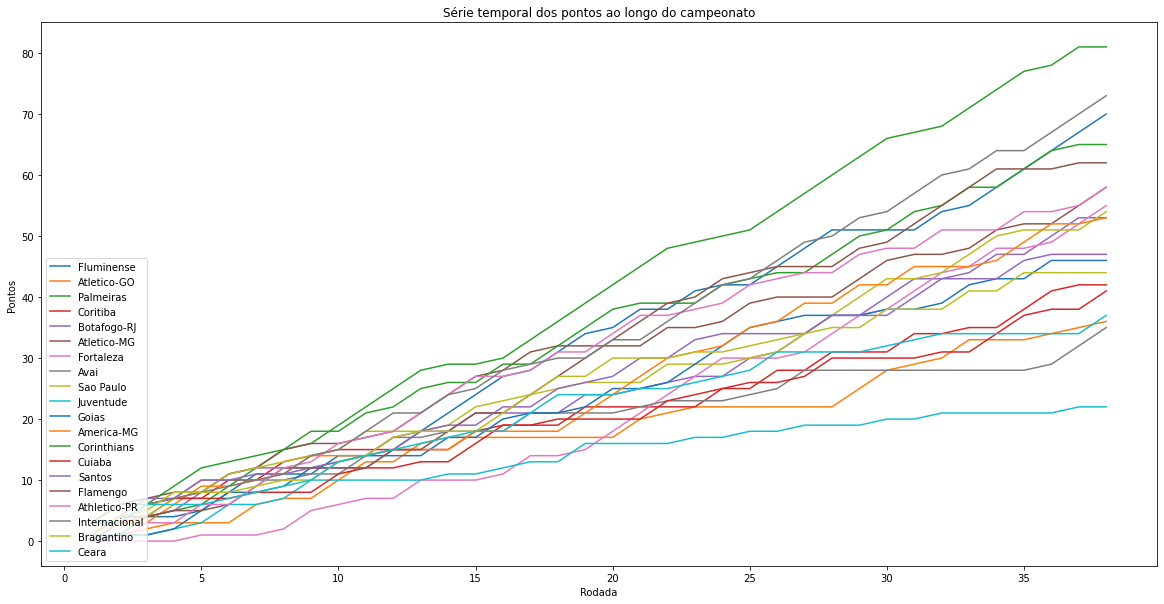

In [ ]:
dataFrameAno = year_dataset_recover(dados, 2022)
tabelaPontos = poins_table_recover(dataFrameAno)

### GERANDO GRÁFICOS DE DESEMPENHO, GOLS E PONTOS E SÉRIE TEMPORAL DE TODOS OS CLUBES DE TODOS OS ANOS

Desempenho do campeão (Palmeiras) no ano 2004
Campeonato com 38 rodadas



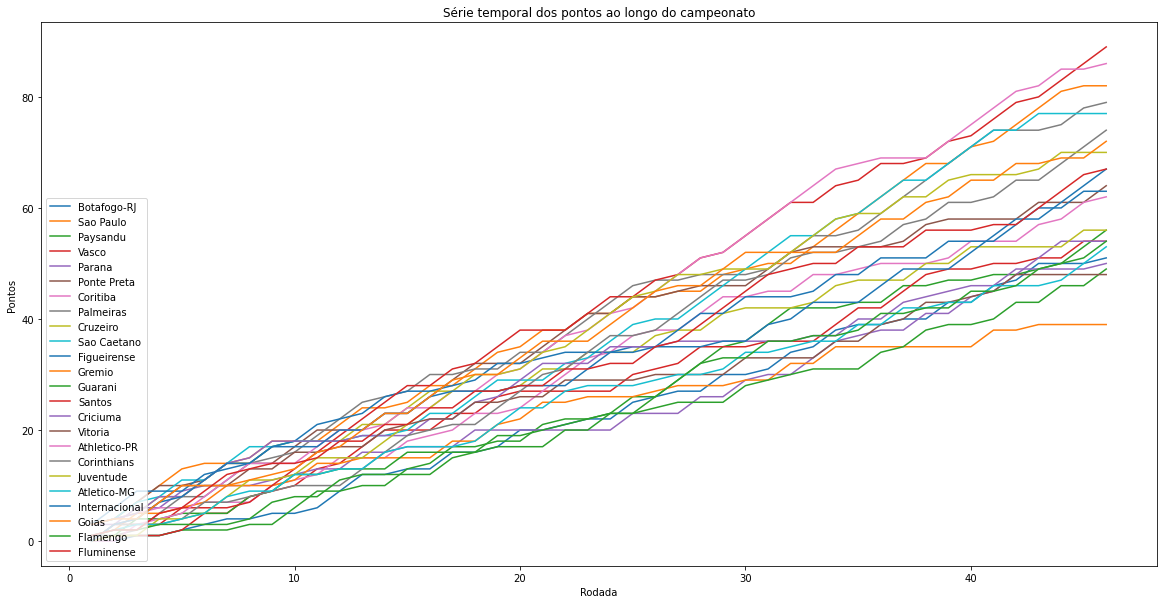

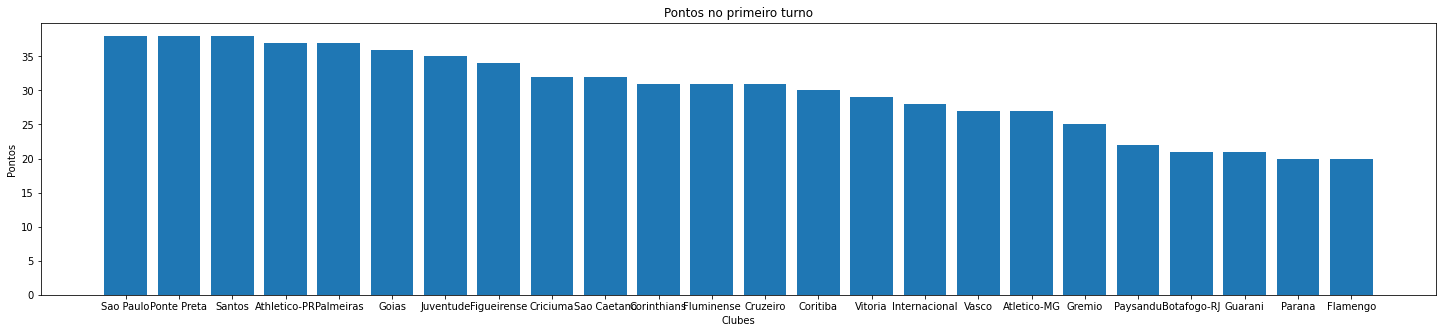

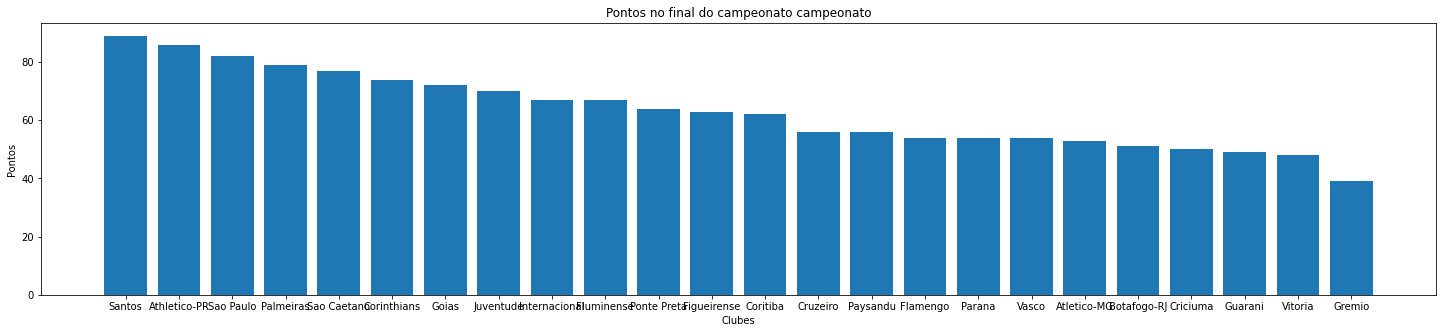

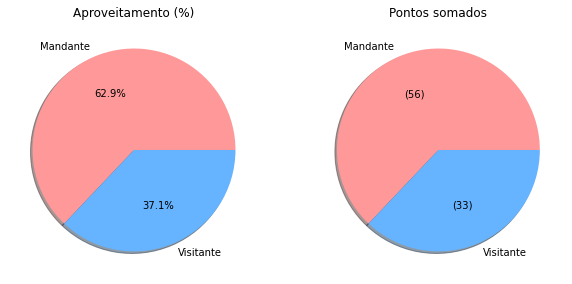

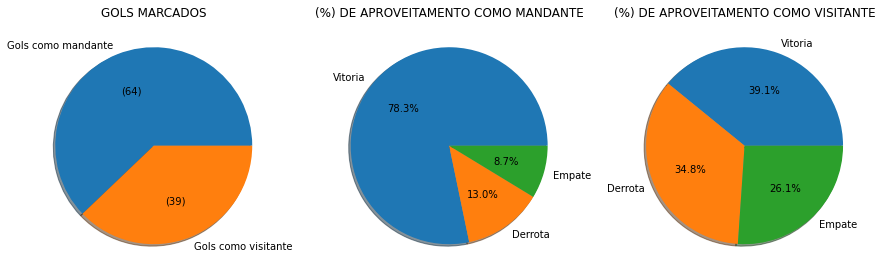








Desempenho do campeão (Santos) no ano 2005
Campeonato com 46 rodadas



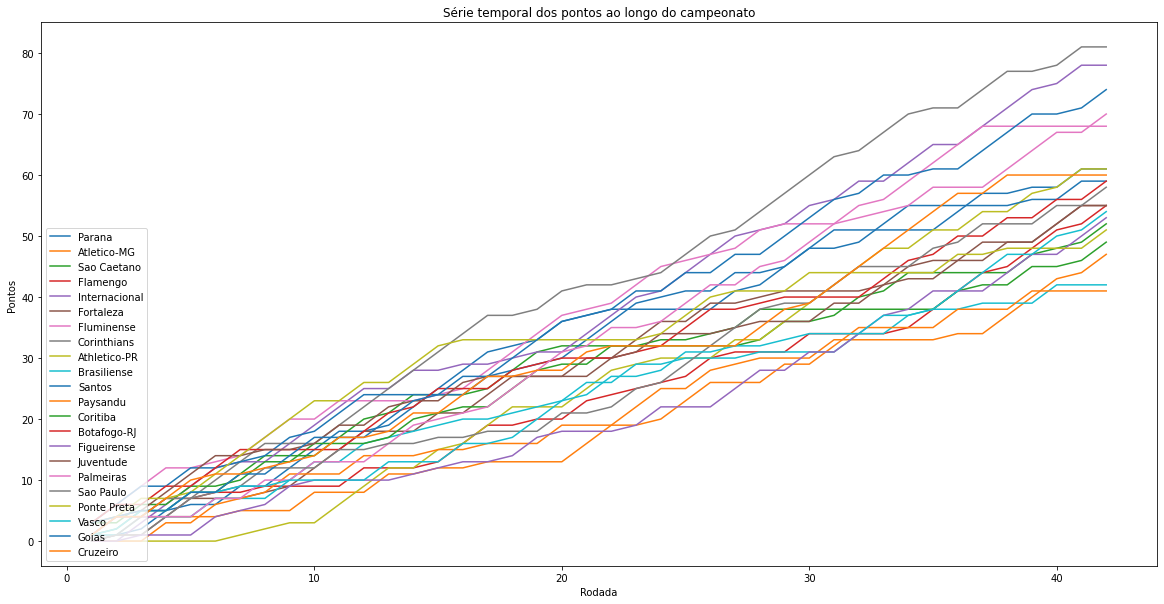

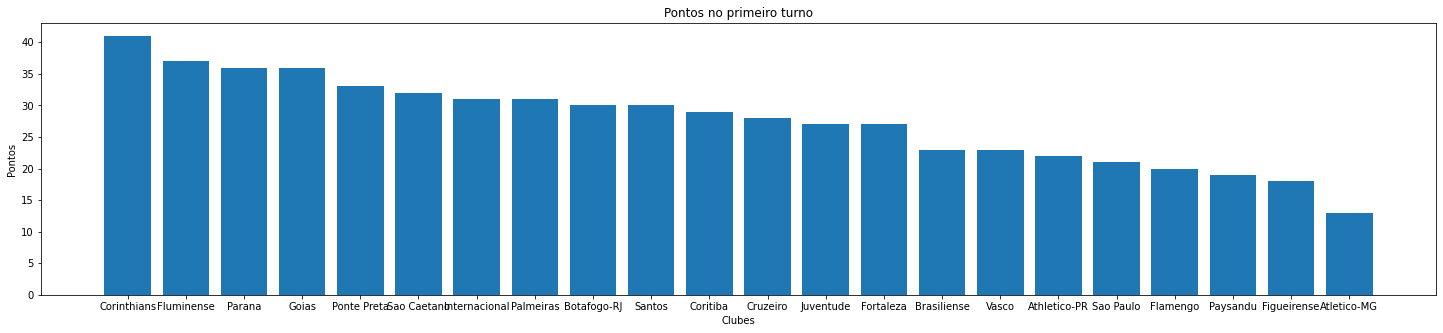

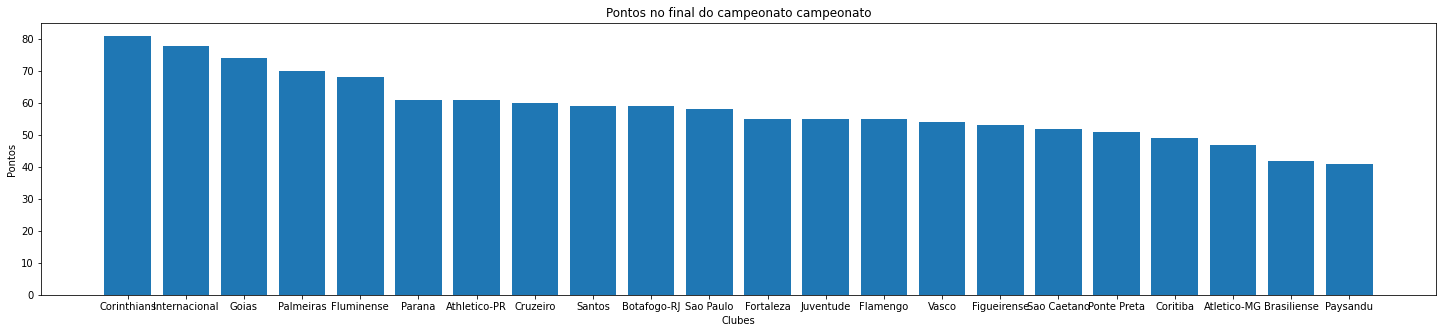

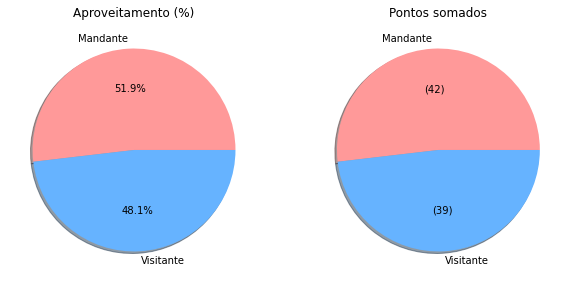

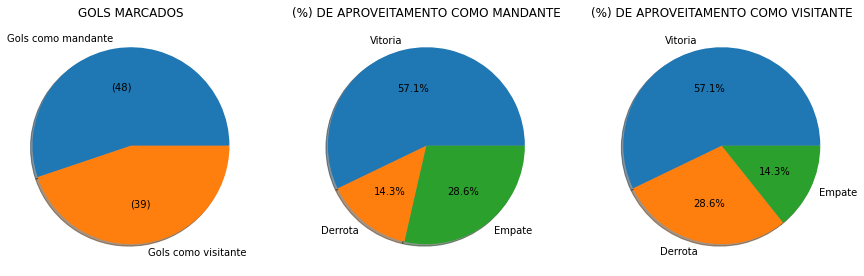








Desempenho do campeão (Corinthians) no ano 2006
Campeonato com 42 rodadas



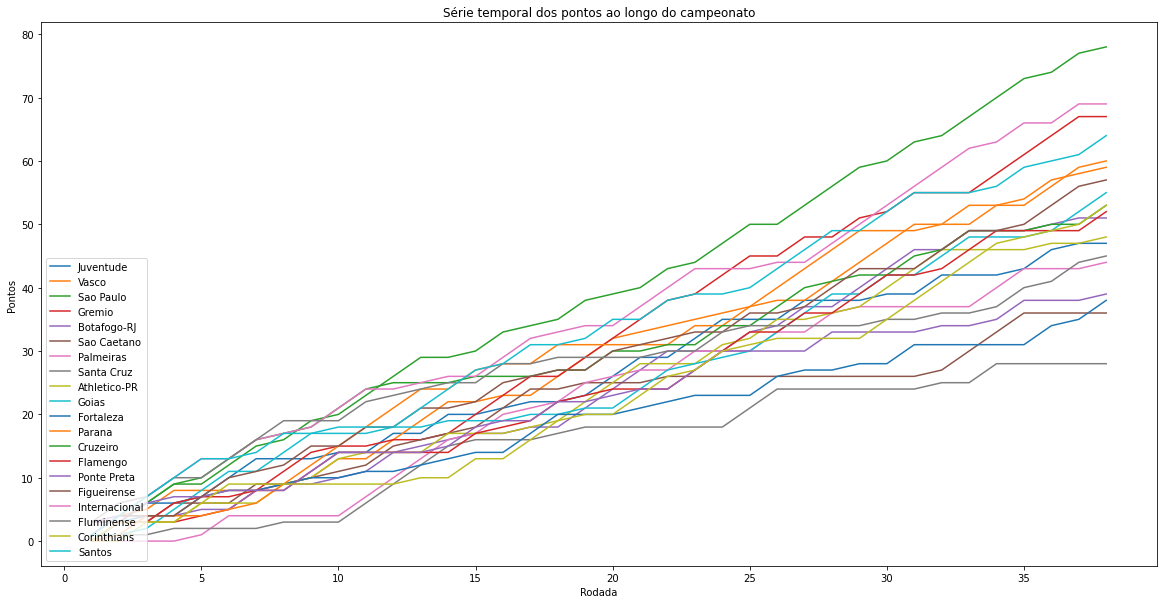

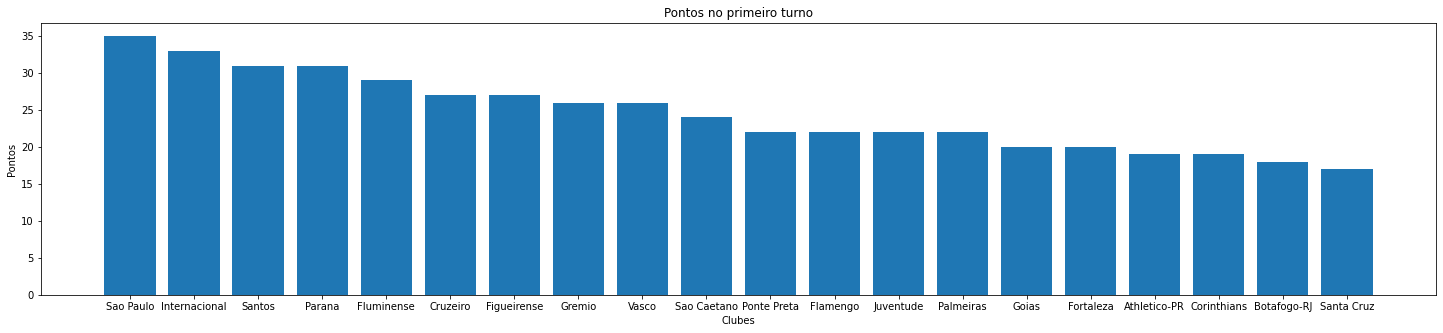

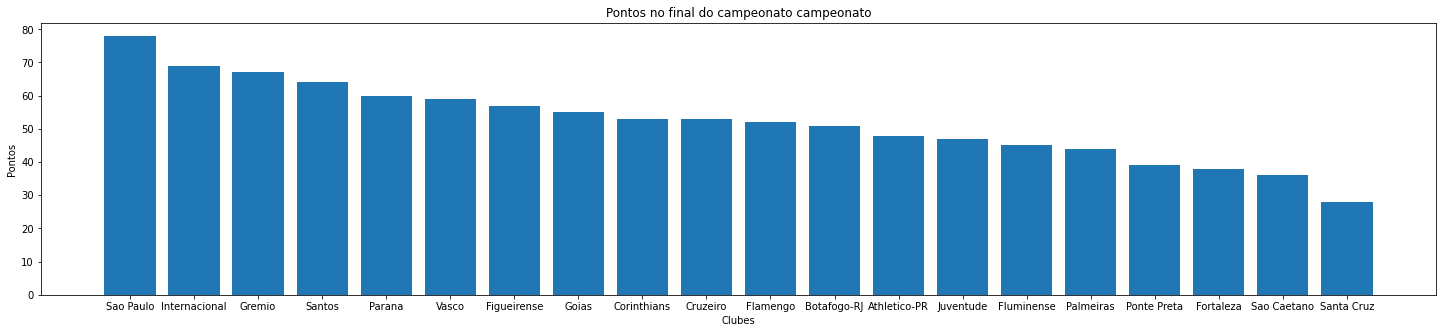

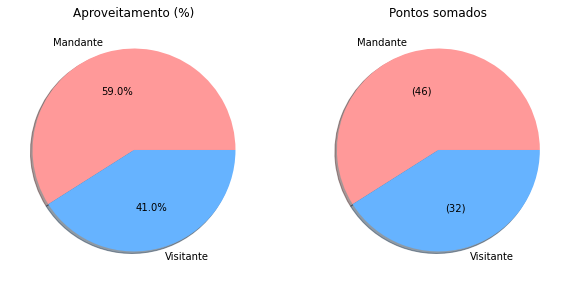

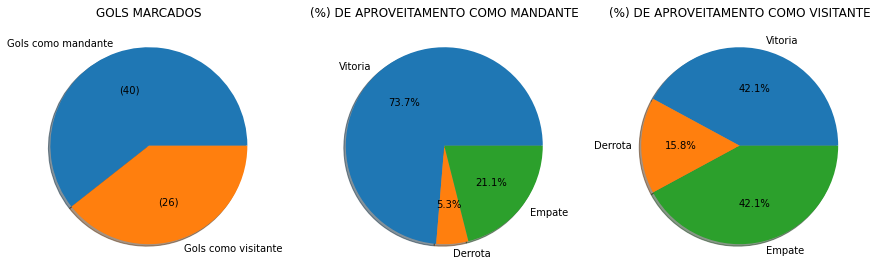








Desempenho do campeão (Sao Paulo) no ano 2007
Campeonato com 38 rodadas



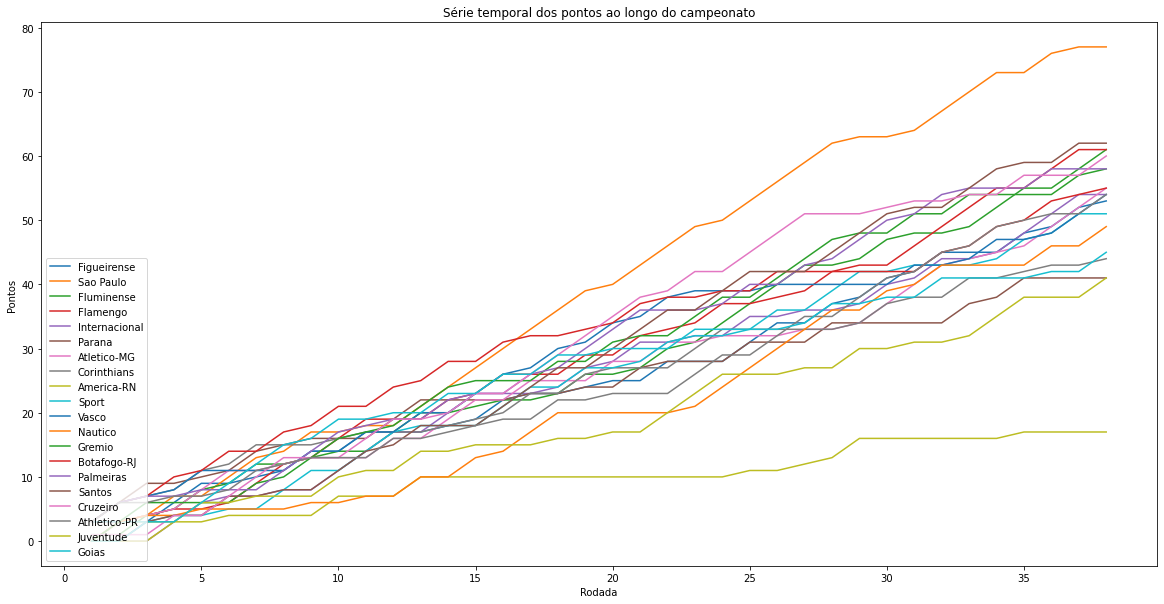

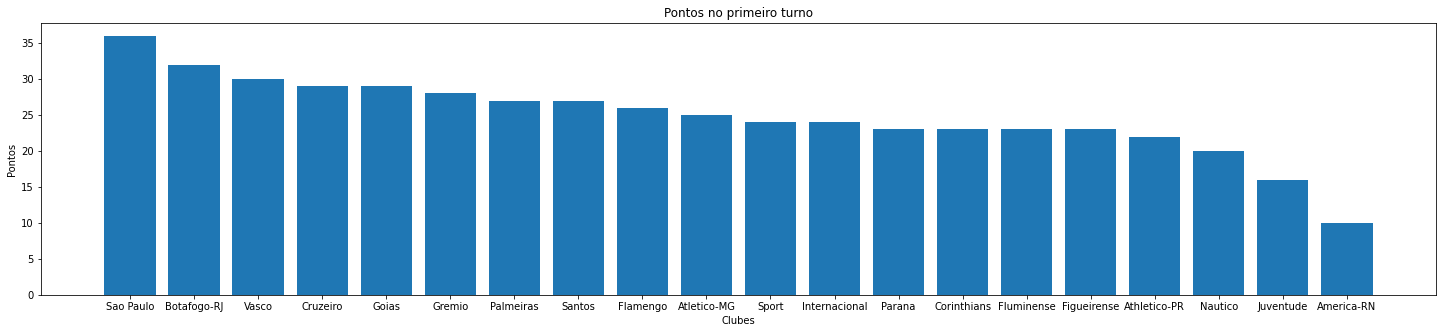

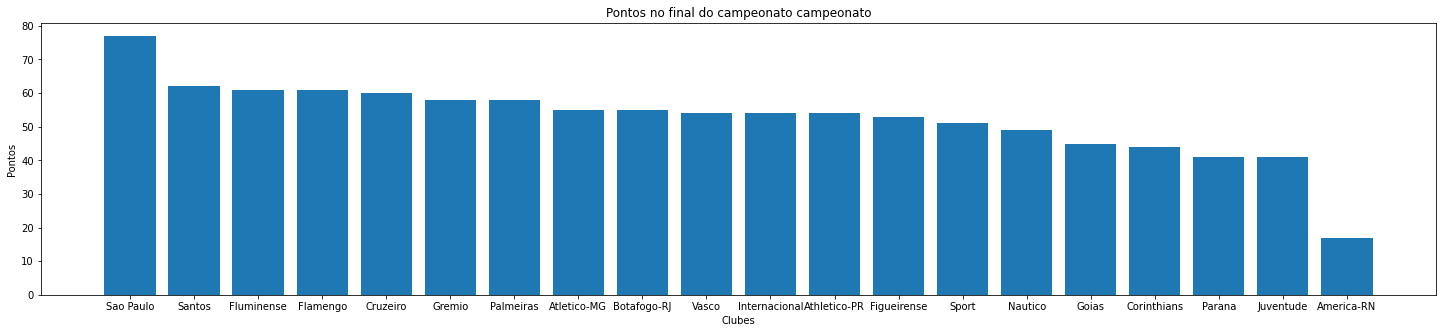

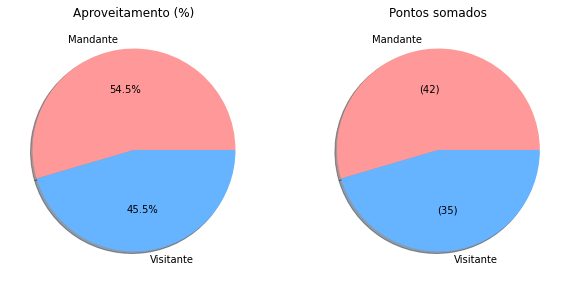

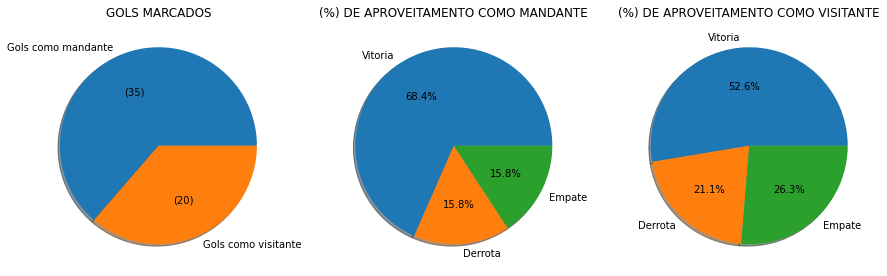








Desempenho do campeão (Sao Paulo) no ano 2008
Campeonato com 38 rodadas



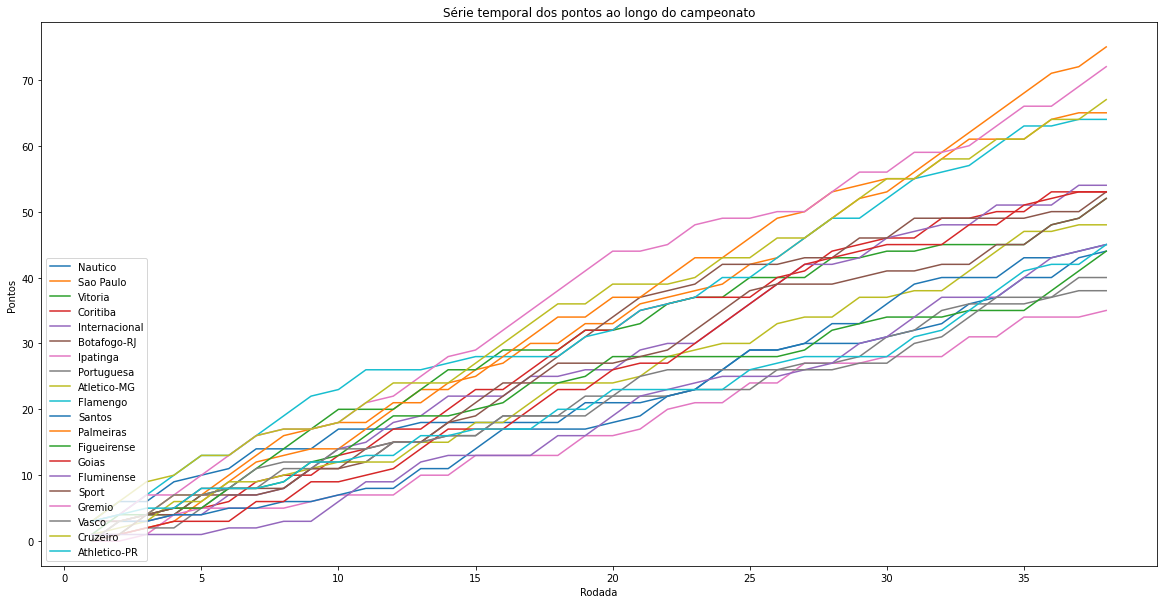

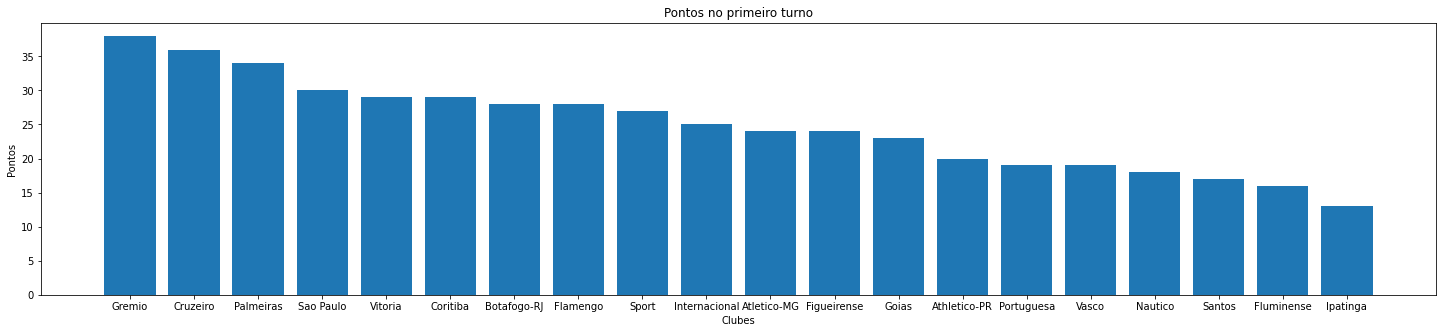

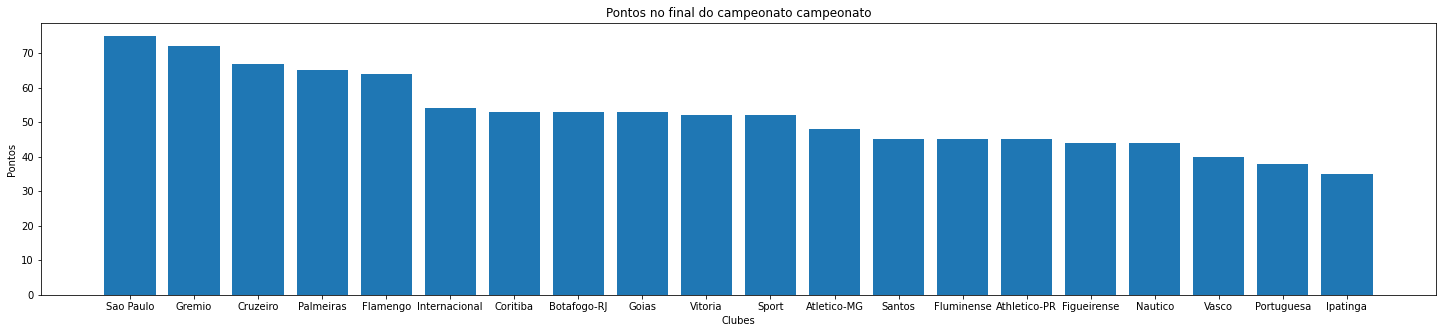

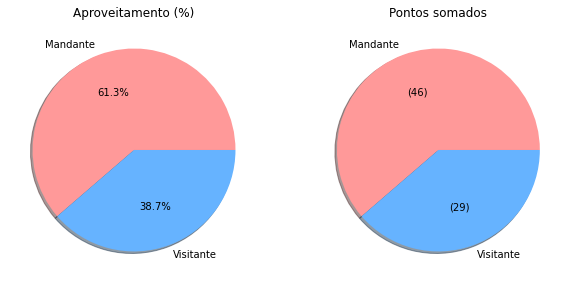

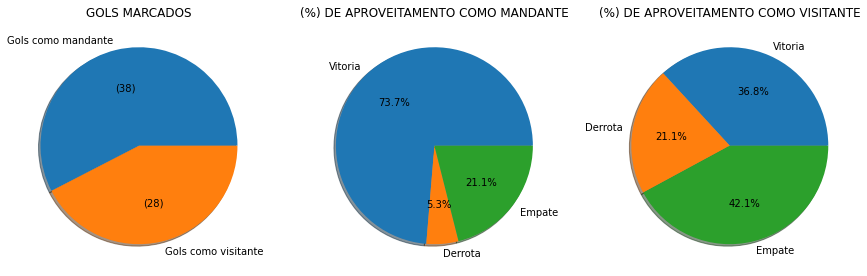








Desempenho do campeão (Sao Paulo) no ano 2009
Campeonato com 38 rodadas



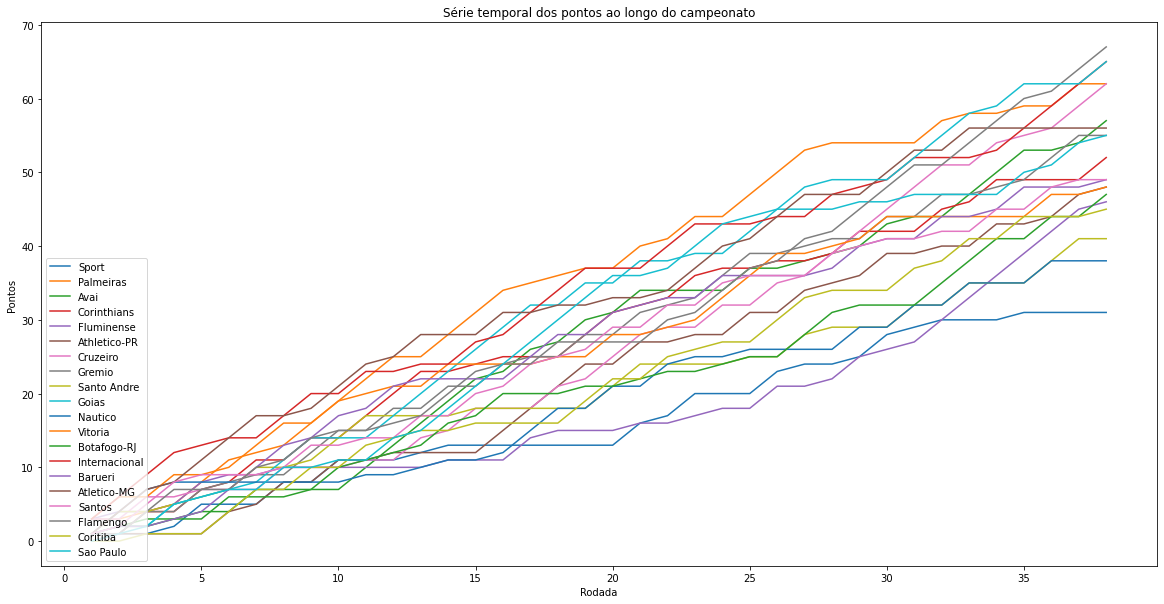

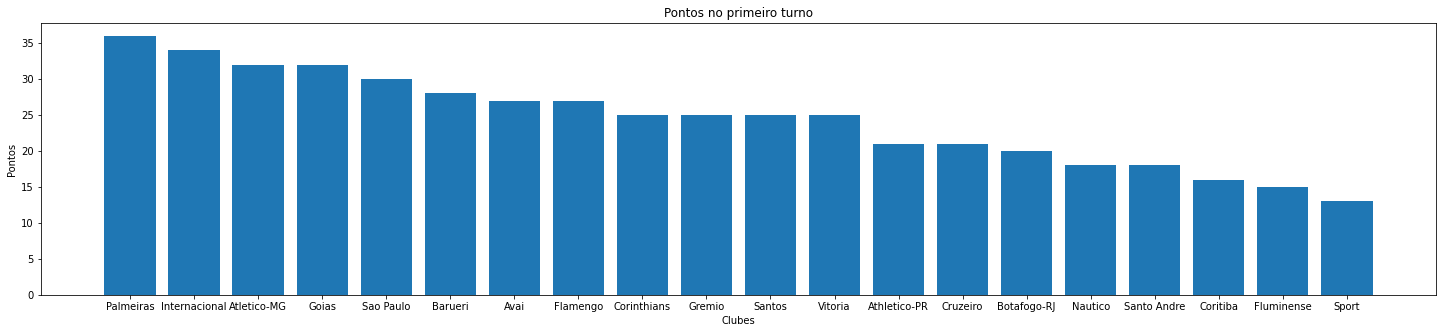

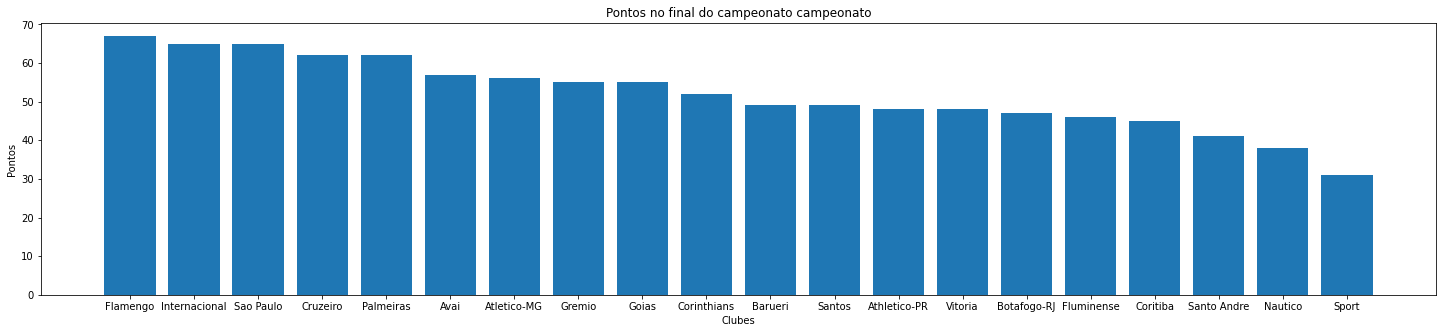

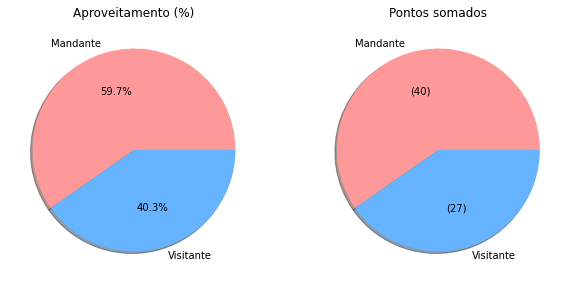

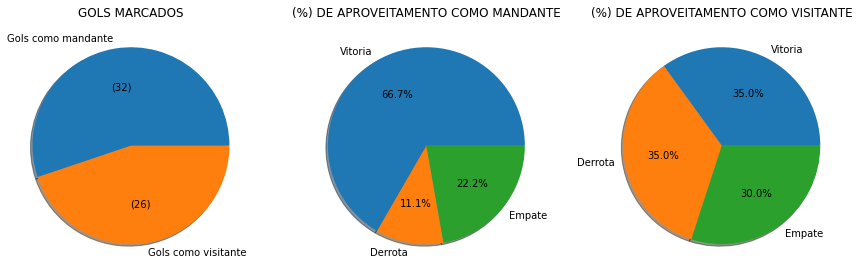








Desempenho do campeão (Flamengo) no ano 2010
Campeonato com 38 rodadas



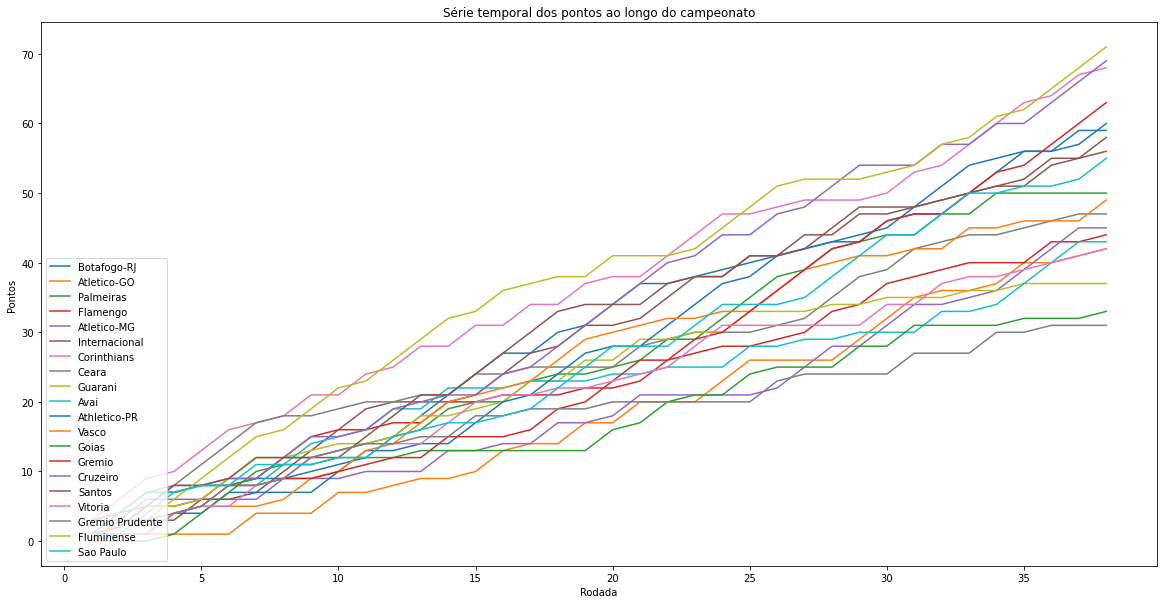

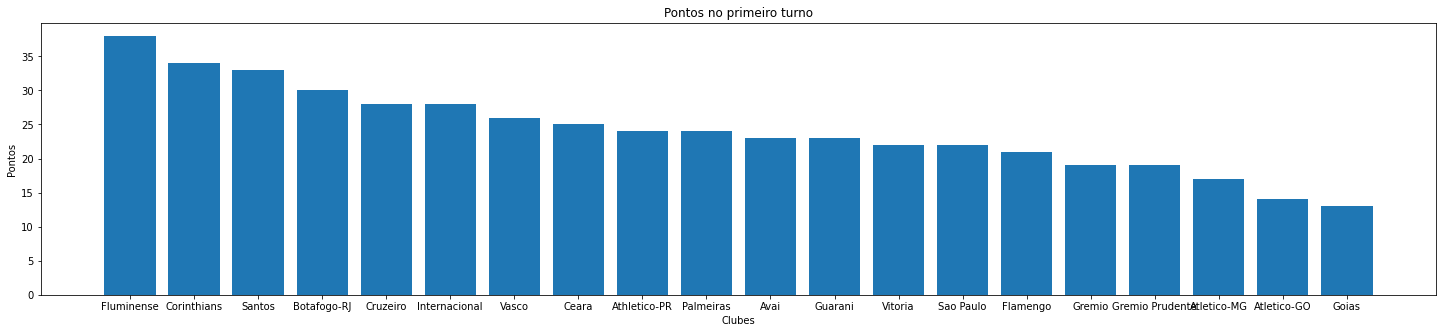

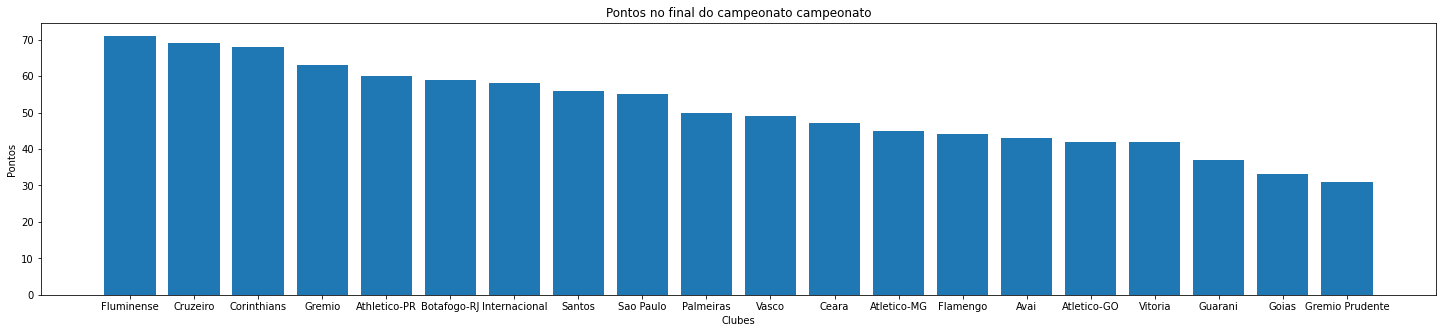

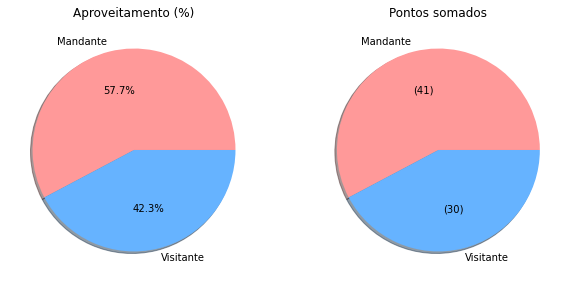

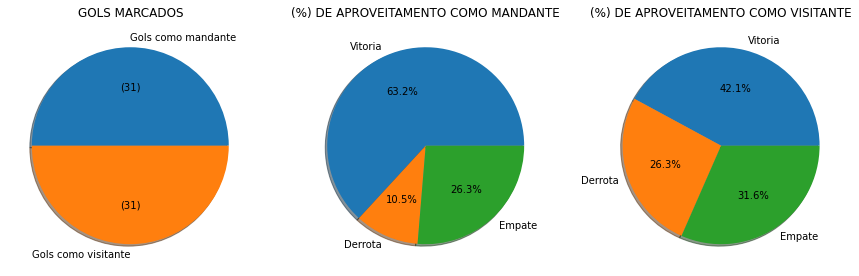








Desempenho do campeão (Fluminense) no ano 2011
Campeonato com 38 rodadas



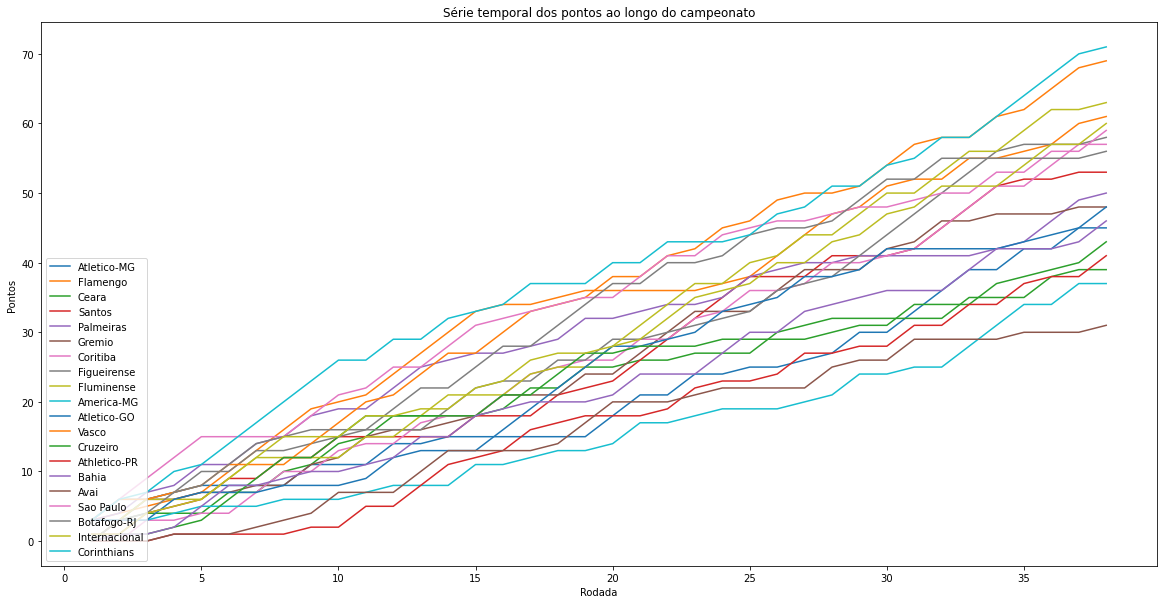

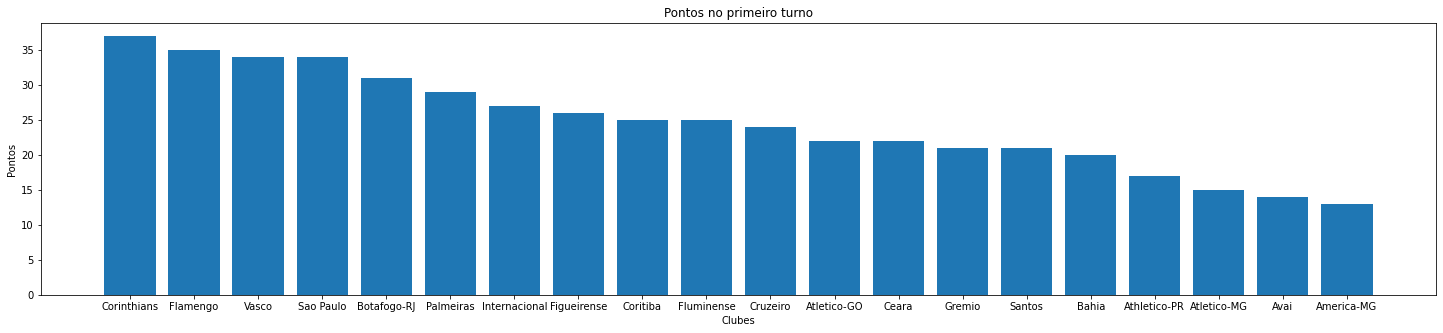

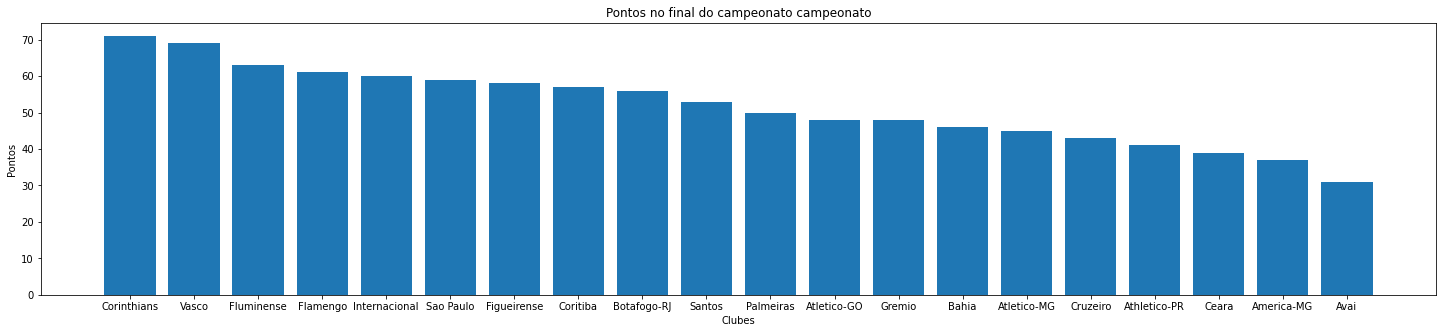

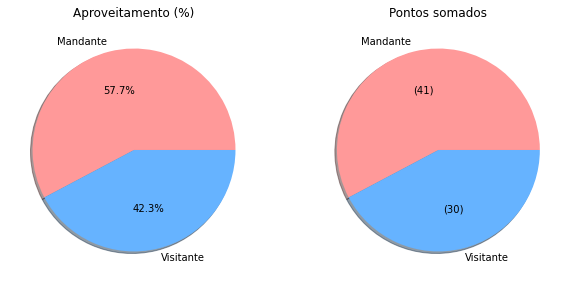

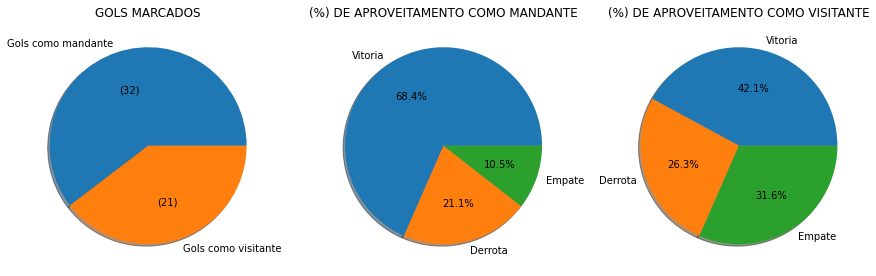








Desempenho do campeão (Corinthians) no ano 2012
Campeonato com 38 rodadas



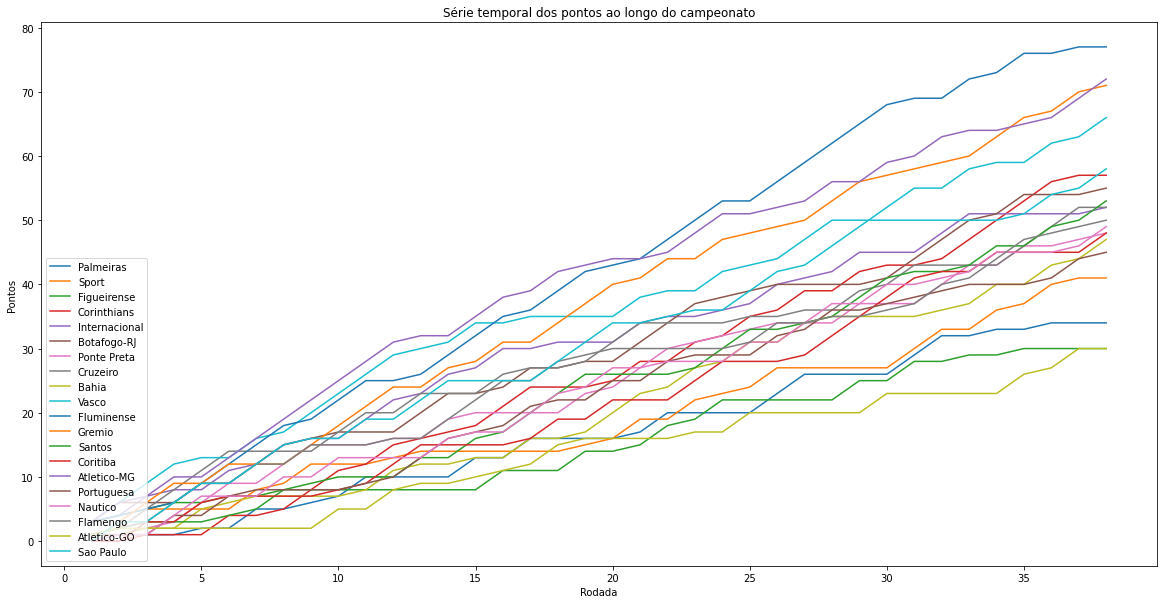

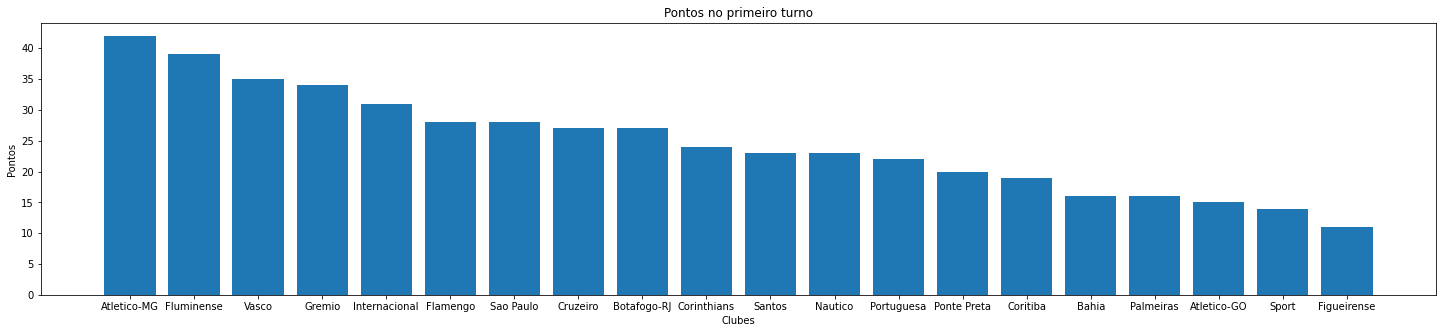

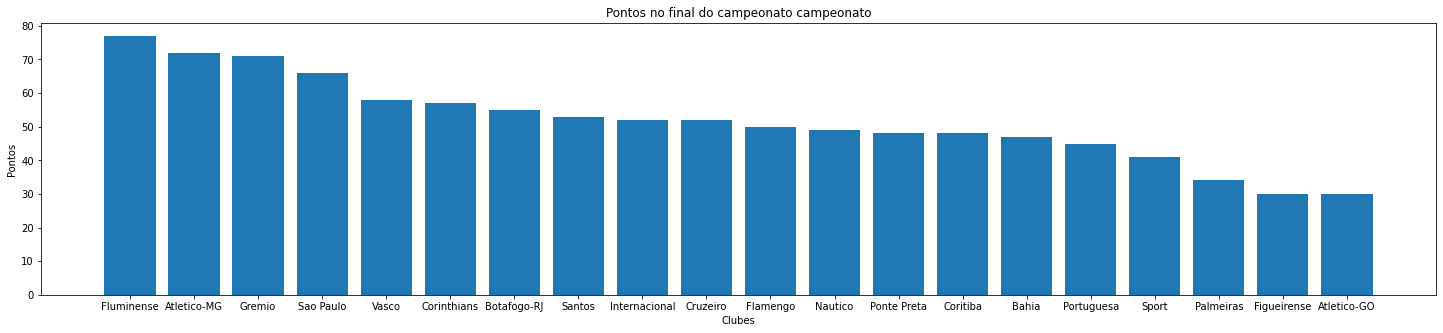

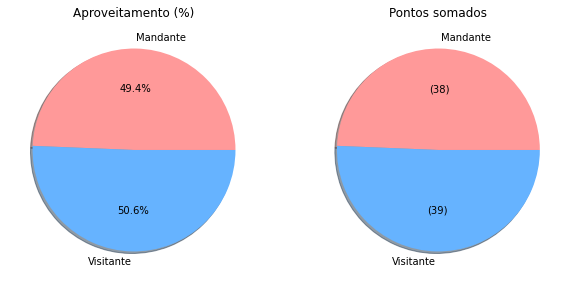

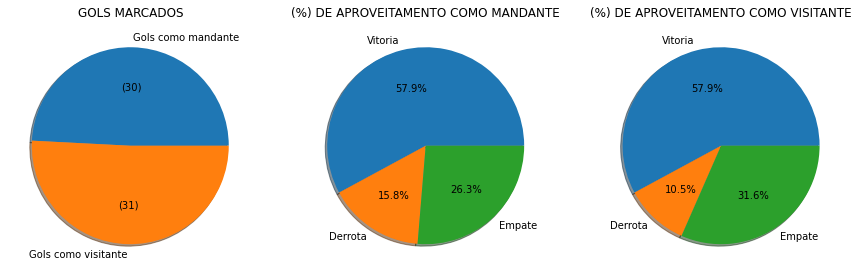








Desempenho do campeão (Fluminense) no ano 2013
Campeonato com 38 rodadas



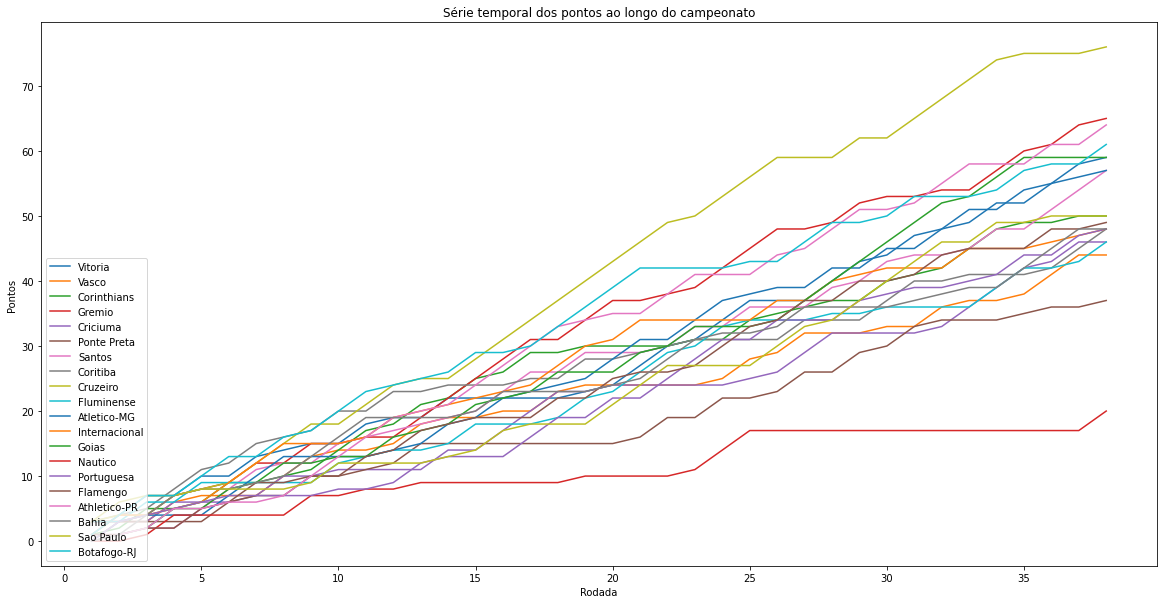

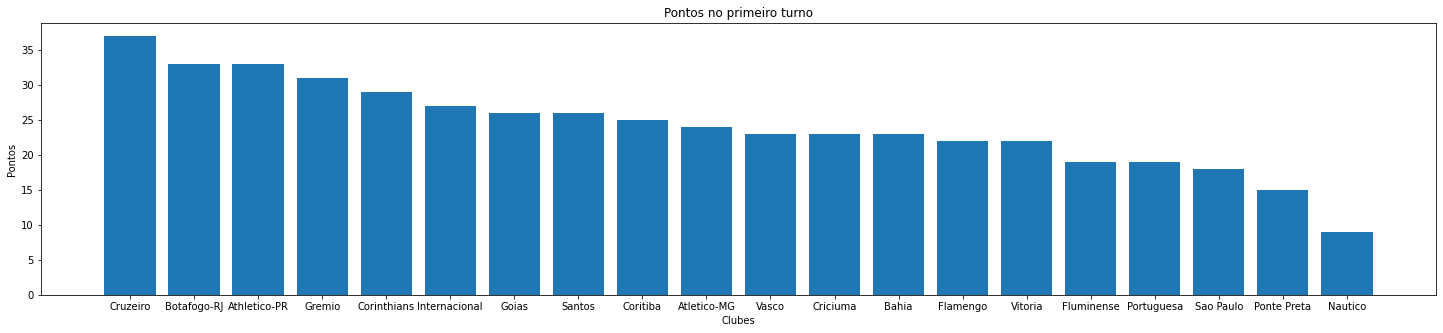

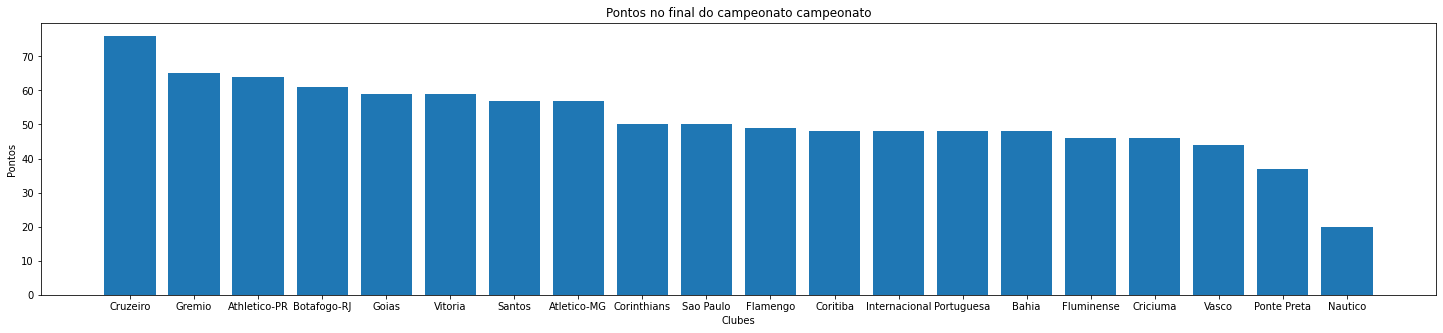

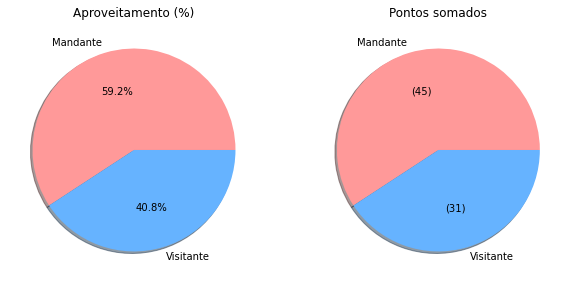

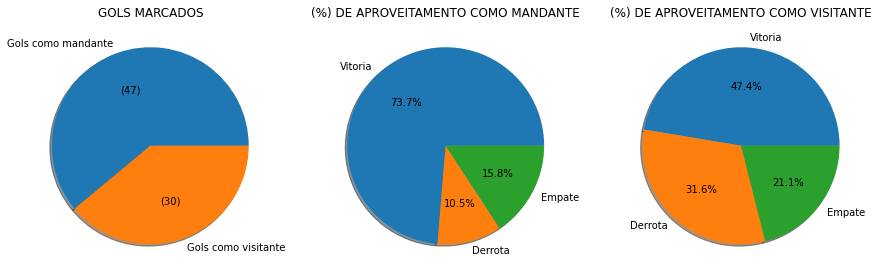








Desempenho do campeão (Cruzeiro) no ano 2014
Campeonato com 38 rodadas



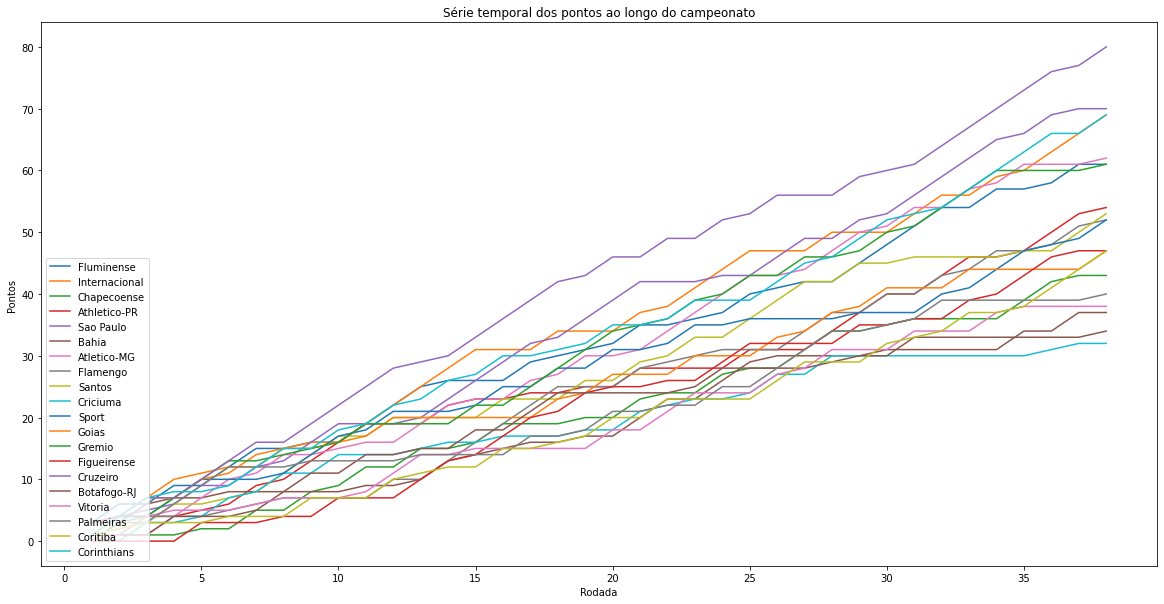

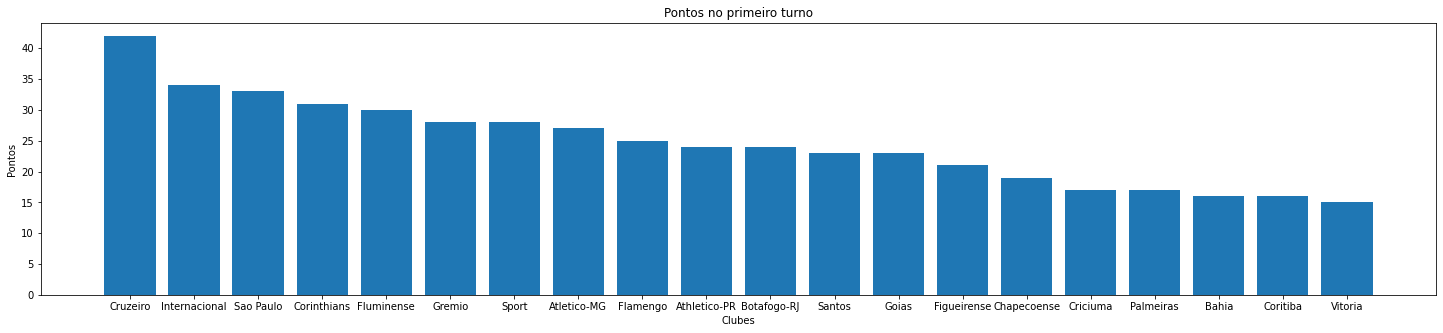

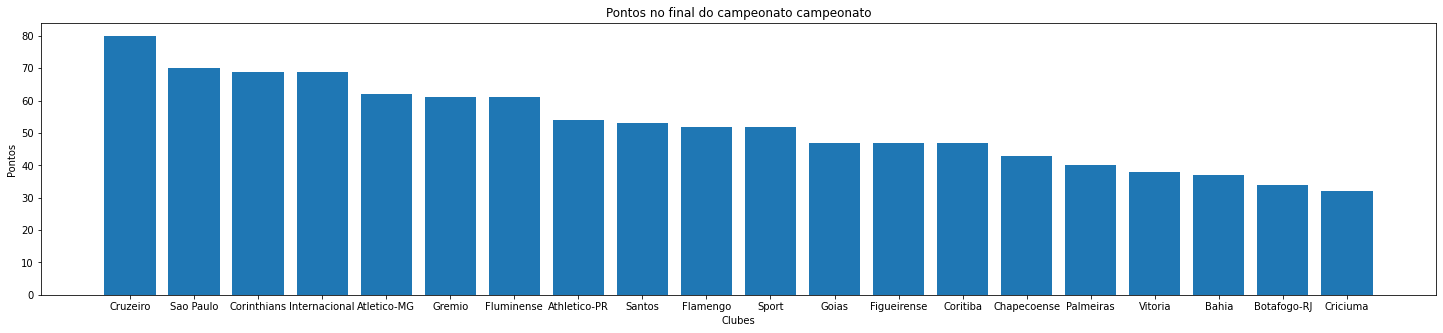

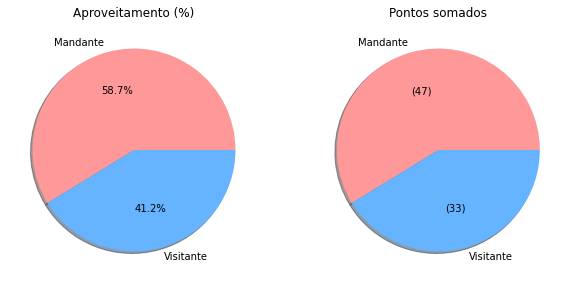

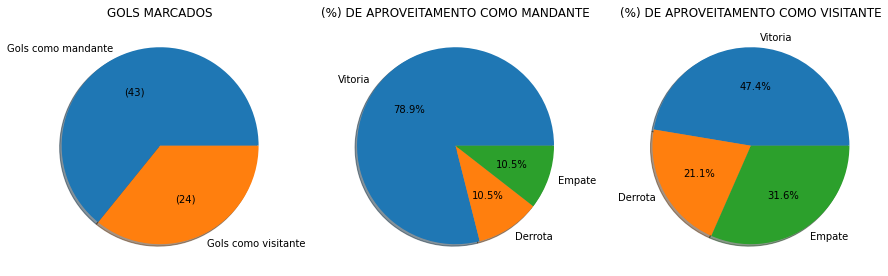








Desempenho do campeão (Cruzeiro) no ano 2015
Campeonato com 38 rodadas



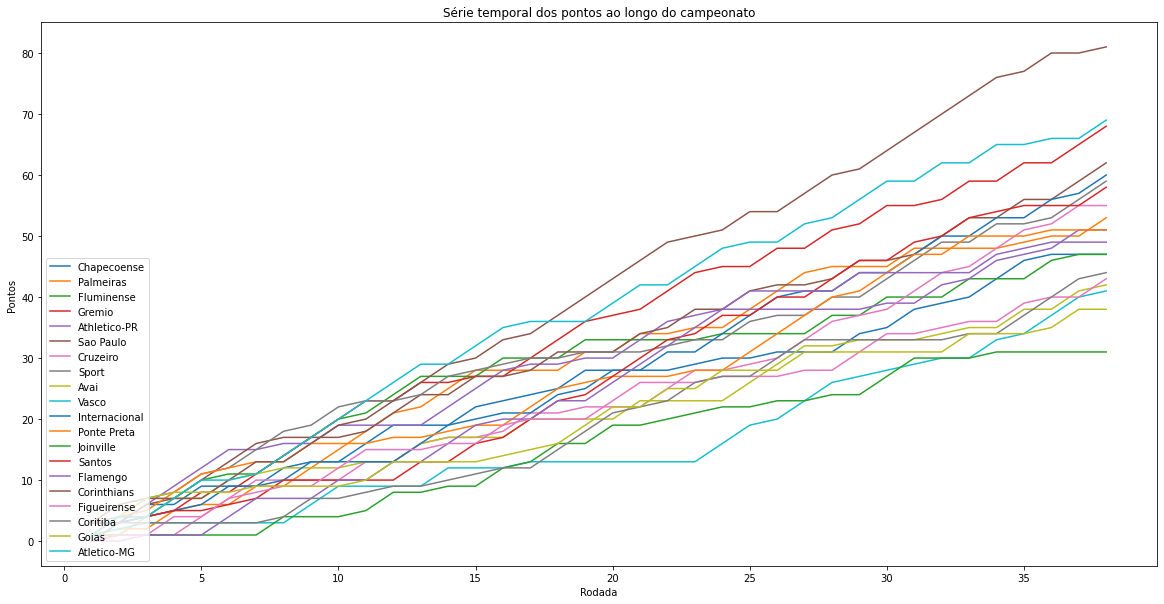

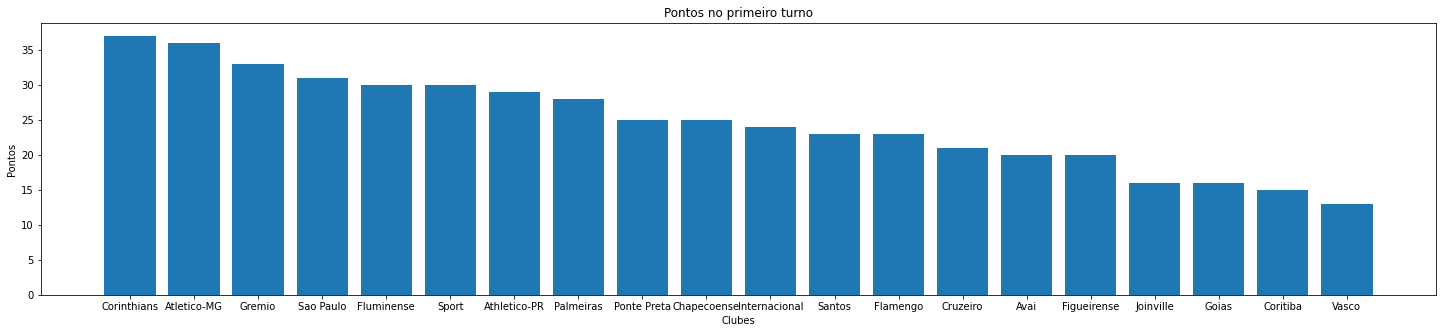

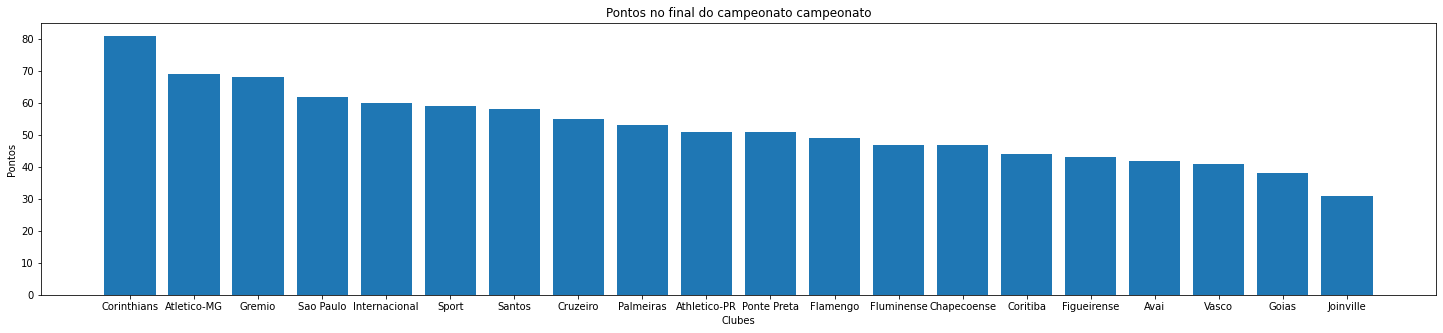

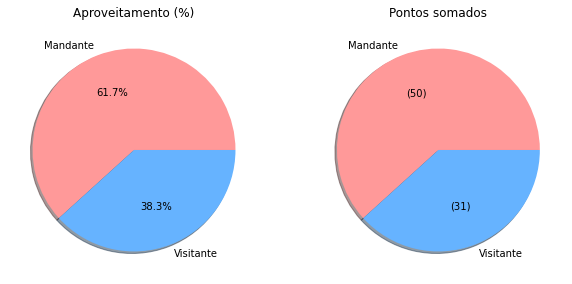

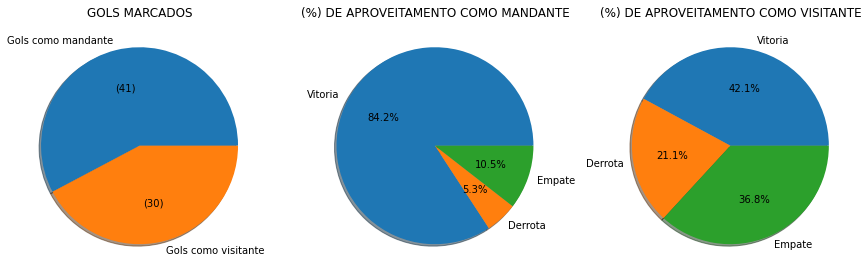








Desempenho do campeão (Corinthians) no ano 2016
Campeonato com 38 rodadas



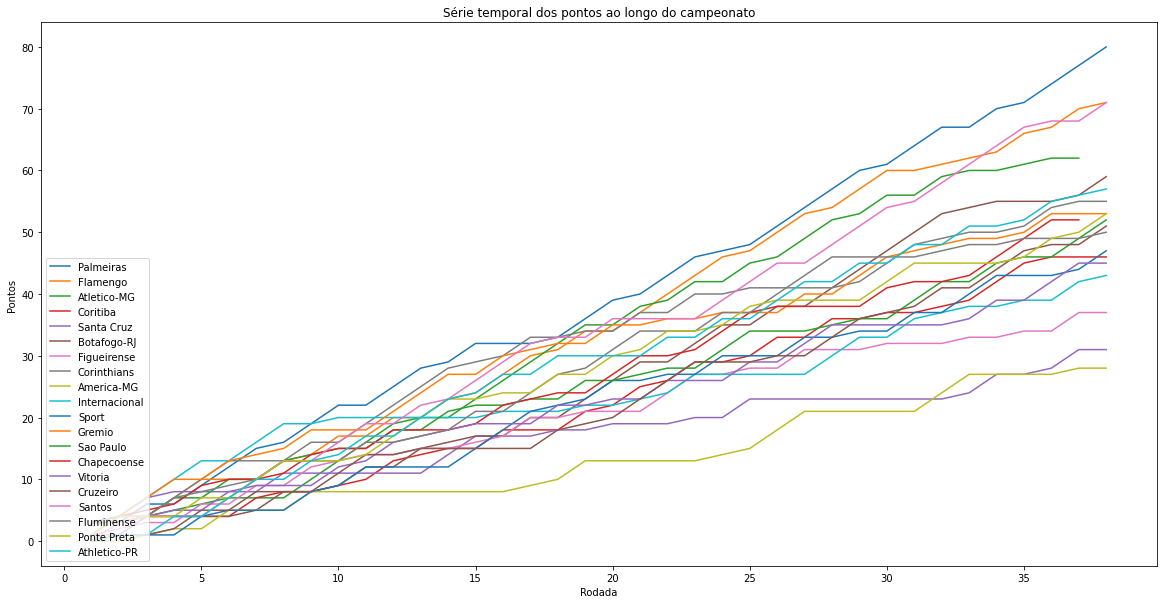

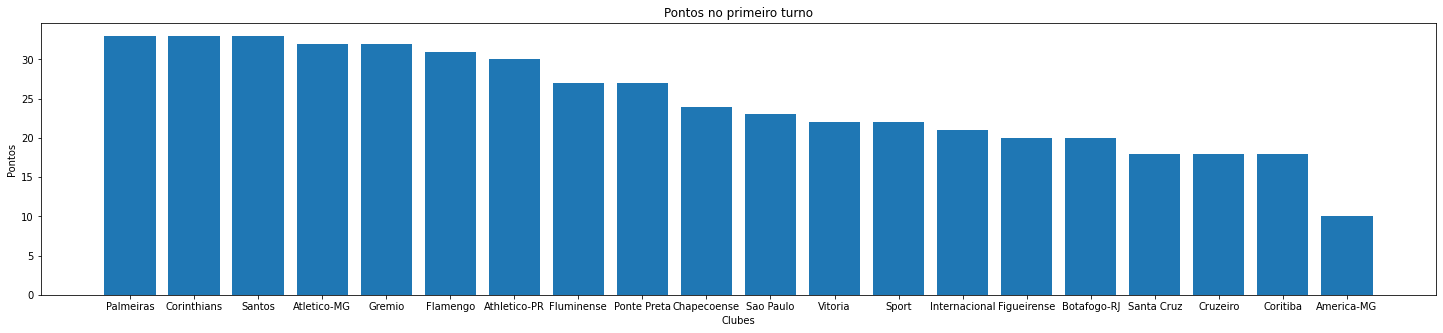

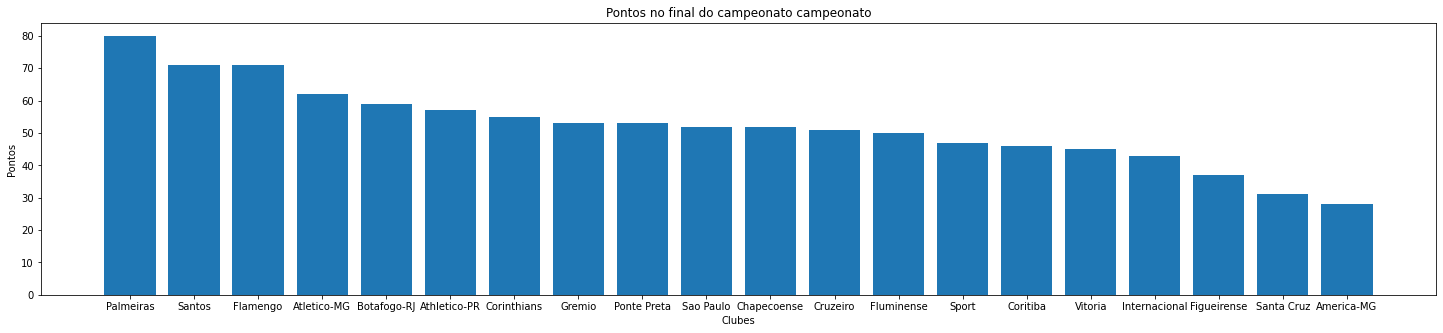

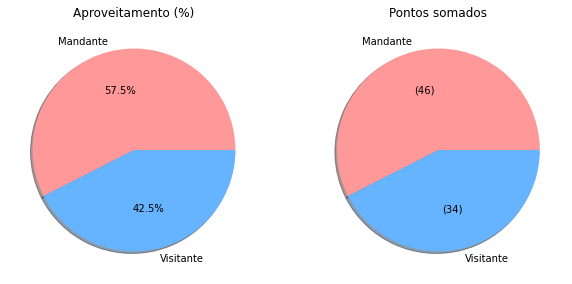

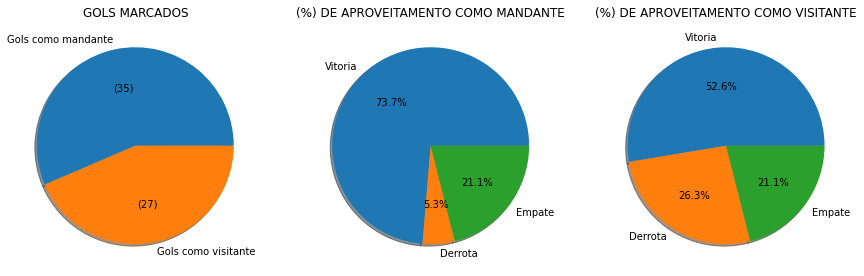








Desempenho do campeão (Palmeiras) no ano 2017
Campeonato com 38 rodadas



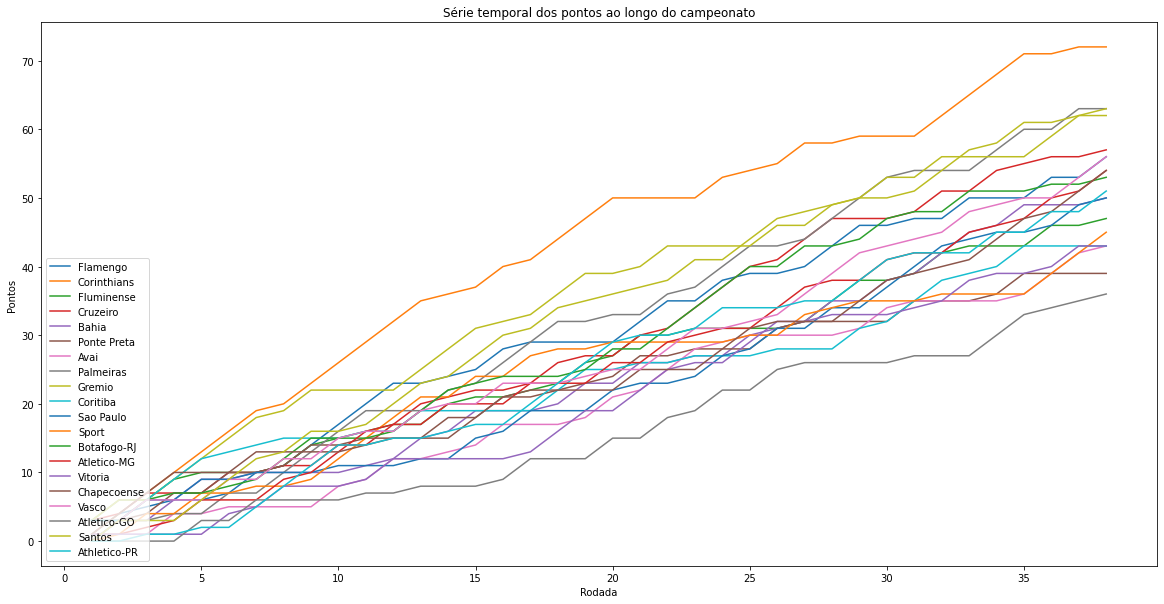

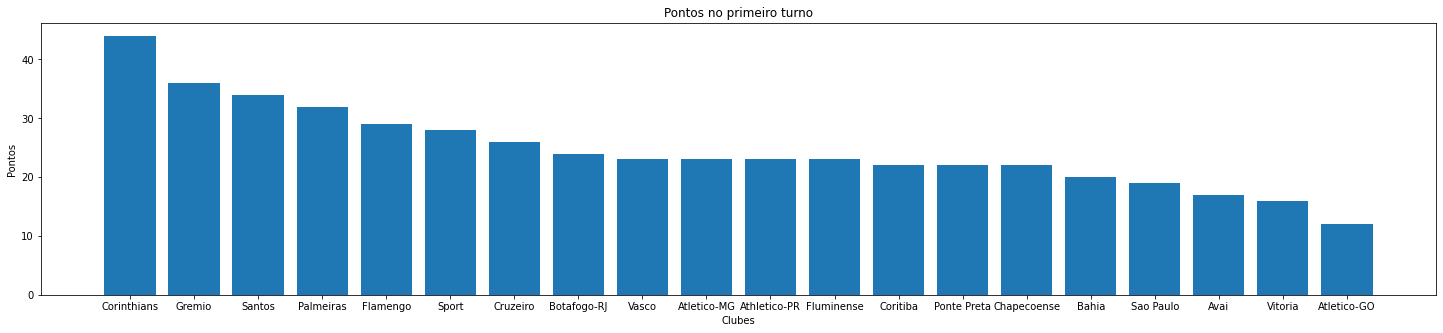

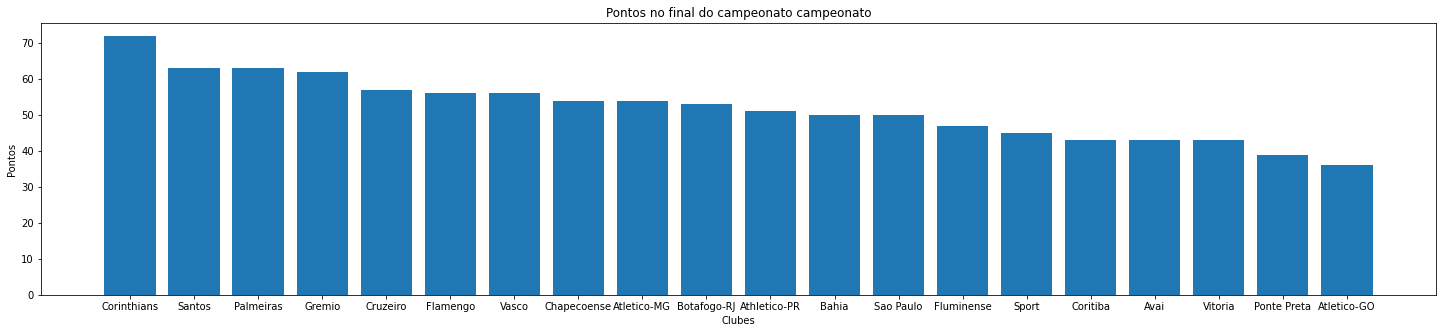

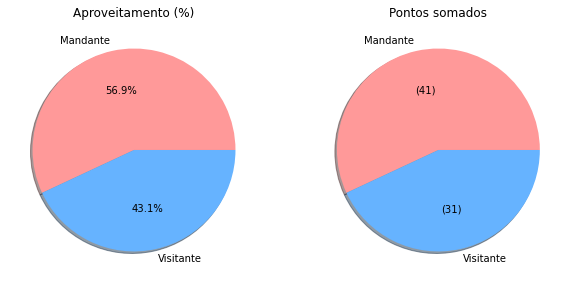

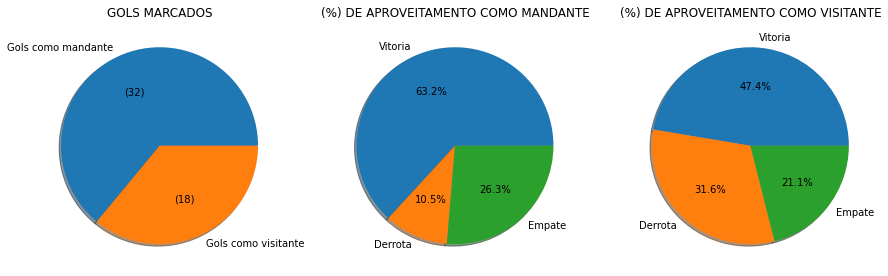








Desempenho do campeão (Corinthians) no ano 2018
Campeonato com 38 rodadas



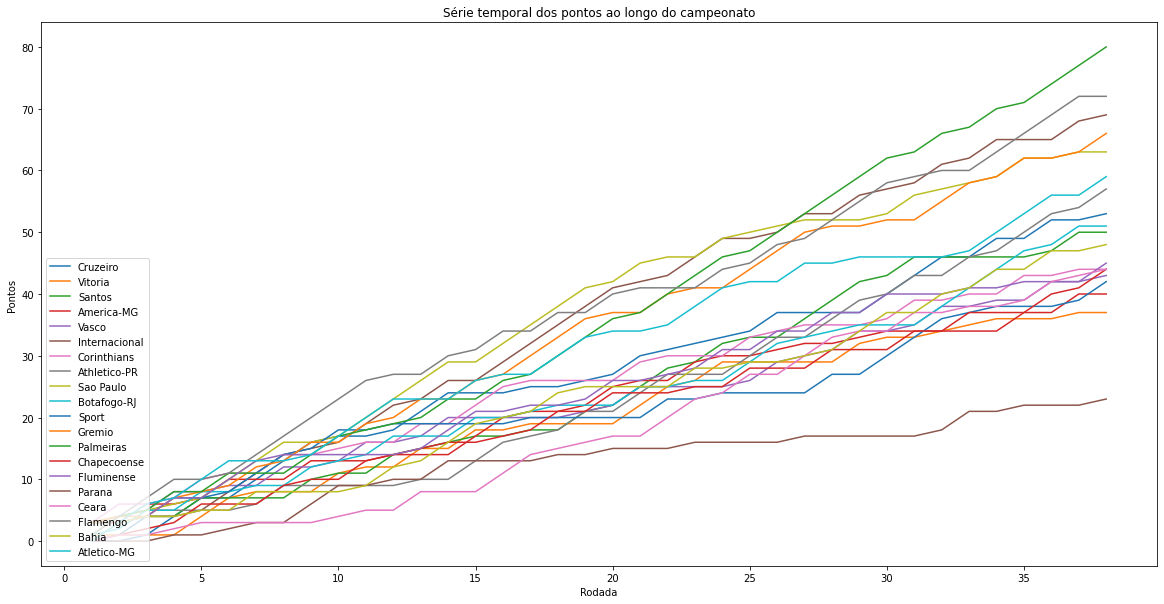

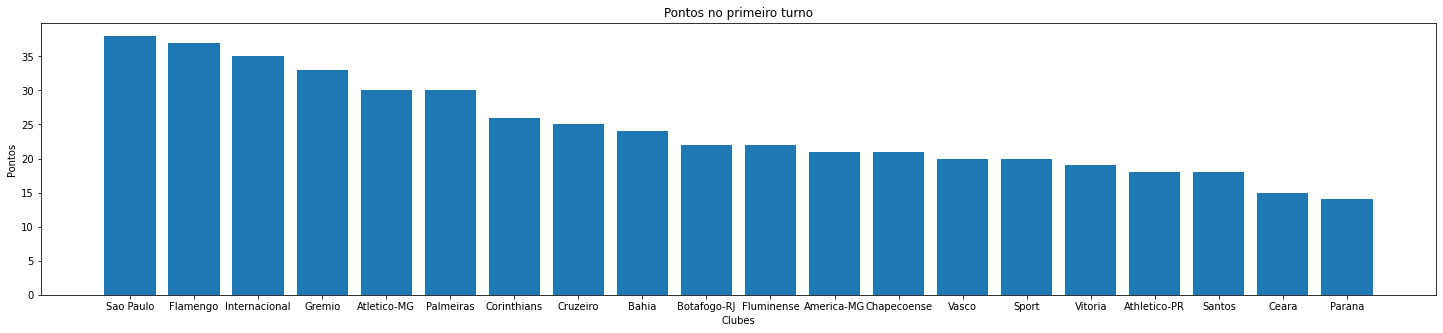

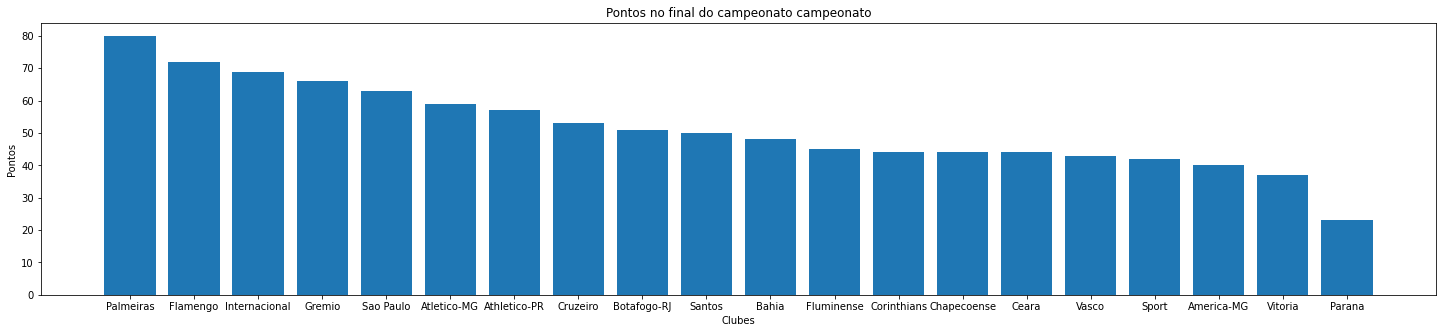

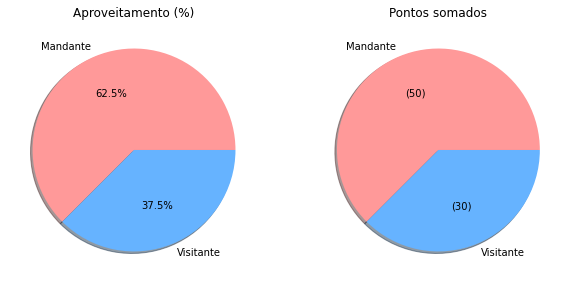

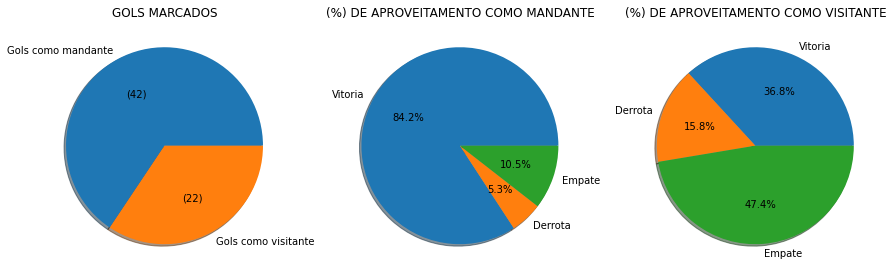








Desempenho do campeão (Palmeiras) no ano 2019
Campeonato com 38 rodadas



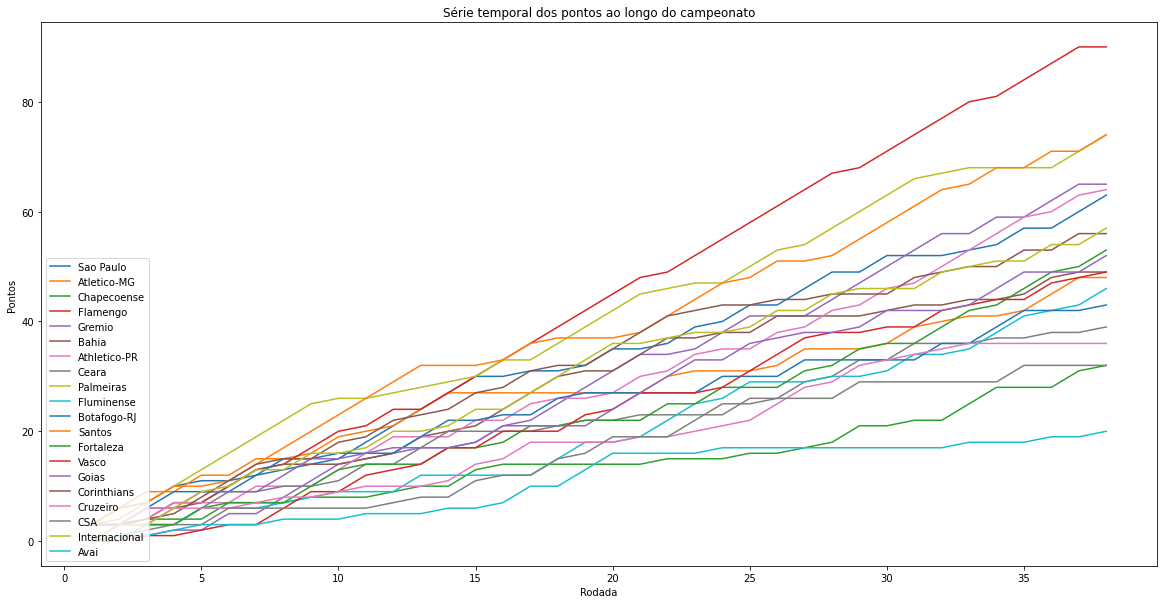

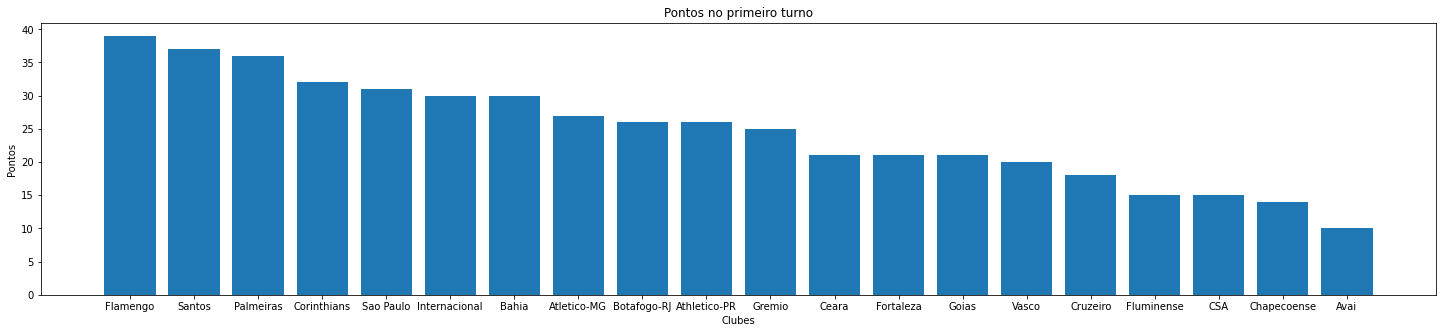

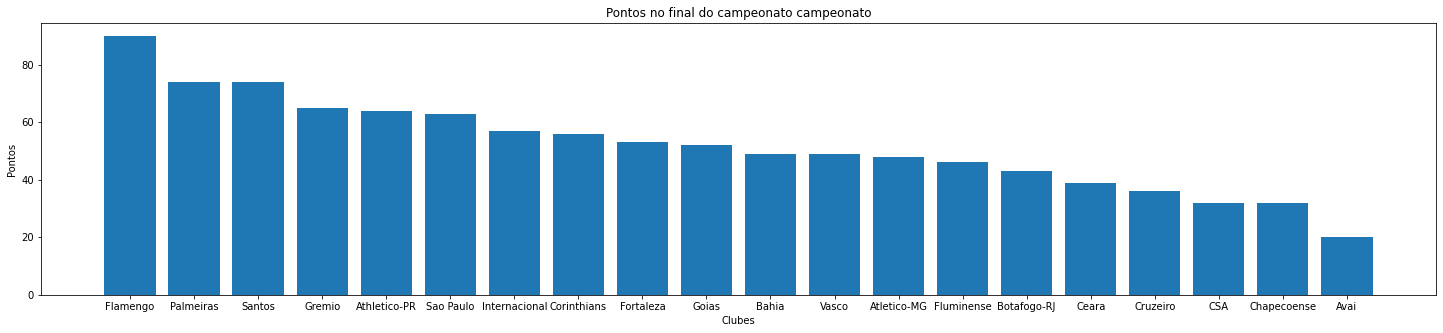

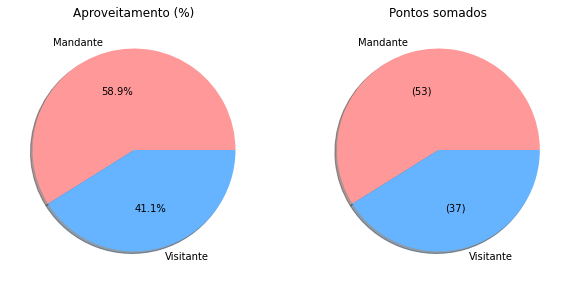

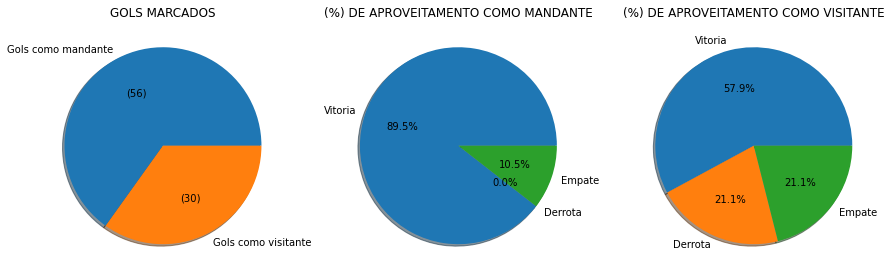

In [ ]:
listaAproveitamentoTotalCampeões = []
listaAproveitamentoMandanteCampeões = []
listaAproveitamentoVisitanteCampeões = []
listaCampeoesPrimeiroTurno = []
listaCampeoes = []

for i in range(2004, 2020):
    print('Desempenho do campeão ('+str(tabelaPontos.index[0])+') no ano '+str(i))
    print('Campeonato com '+str(dataFrameAno.Rodada.max())+' rodadas\n')

    dataFrameAno = year_dataset_recover(dados, i)
    dataFrameAno = dataFrameAno.sort_values(by='Rodada', ascending=True)

    tabelaPontos = poins_table_recover(dataFrameAno)
    tabelaPrimeiroTurno = table_first_turn(dataFrameAno)

    plt.figure(figsize=(25, 5))
    plt.xlabel('Clubes')
    plt.ylabel('Pontos')
    plt.title('Pontos no primeiro turno')

    plt.bar(tabelaPrimeiroTurno.index, tabelaPrimeiroTurno['pontos'])
    plt.show()

    plt.figure(figsize=(25, 5))
    plt.xlabel('Clubes')
    plt.ylabel('Pontos')
    plt.title('Pontos no final do campeonato campeonato')

    plt.bar(tabelaPontos.index, tabelaPontos['pontos'])
    plt.show()

    dfPlacarMandante = dataFrame_winners(dataFrameAno, tabelaPontos, 0)
    dfPlacarVisitante = dataFrame_winners(dataFrameAno, tabelaPontos, 1)
    dfVitoriasMandante = dataFrame_winners(dataFrameAno, tabelaPontos, 2)
    dfVitoriasVisitante = dataFrame_winners(dataFrameAno, tabelaPontos, 3)

    aproveitamento_total = tabelaPontos.pontos/(dataFrameAno.Rodada.max()*3)*100
    aproveitamento_total_mandante = tabelaPontos.pontos[0]/(dataFrameAno.Rodada.max()*3)*100
    #soma o aproveitamento total do campeão do ano n aproveitamento medio
    listaAproveitamentoTotalCampeões.append(aproveitamento_total_mandante)

    vitoriasTotaisMandante = int(dfVitoriasMandante[dfVitoriasMandante['Vencedor']==tabelaPontos.index[0]].value_counts()*3)
    empatesTotaisMandante = int(dfVitoriasMandante[dfVitoriasMandante['Vencedor']=='-'].value_counts())
    aproveitamento_mandante = (vitoriasTotaisMandante + empatesTotaisMandante)/(dataFrameAno.Rodada.max()/2*3)*100

    #soma o aproveitamento como mandante do campeão do ano n aproveitamento medio
    listaAproveitamentoMandanteCampeões.append(aproveitamento_mandante)

    listaCampeoesPrimeiroTurno.append(champion_first_turn(dataFrameAno))

    vitoriasTotaisVisitante = int(dfVitoriasVisitante[dfVitoriasVisitante['Vencedor']==tabelaPontos.index[0]].value_counts()*3)
    empatesTotaisVisitante = int(dfVitoriasVisitante[dfVitoriasVisitante['Vencedor']=='-'].value_counts())
    aproveitamento_visitante = (vitoriasTotaisVisitante + empatesTotaisVisitante)/(dataFrameAno.Rodada.max()/2*3)*100

    #soma o aproveitamento como visitante do campeão do ano n aproveitamento medio
    listaAproveitamentoVisitanteCampeões.append(aproveitamento_visitante)

    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']


    fig, axs = plt.subplots(1, 2, figsize=(10,10))

    axs[0].pie([aproveitamento_mandante,
          aproveitamento_visitante],
          labels=['Mandante', 'Visitante'],
          autopct='%1.1f%%',  shadow=True,
          colors=colors)
    axs[0].set_title('Aproveitamento (%)')

    values = [vitoriasTotaisMandante+empatesTotaisMandante, vitoriasTotaisVisitante+empatesTotaisVisitante]

    axs[1].pie(values,
          labels=['Mandante', 'Visitante'],
          autopct=make_autopct(values),  shadow=True,
          colors=colors)
    axs[1].set_title('Pontos somados')

    plt.show()

    dfPlacarMandante = dataFrame_winners(dataFrameAno, tabelaPontos, 0)
    dfPlacarVisitante = dataFrame_winners(dataFrameAno, tabelaPontos, 1)
    dfVitoriasMandante = dataFrame_winners(dataFrameAno, tabelaPontos, 2)
    dfVitoriasVisitante = dataFrame_winners(dataFrameAno, tabelaPontos, 3)

    winners_losers_or_goalless_mandante = winners_losers_or_goalless(dfVitoriasMandante, tabelaPontos)
    winners_losers_or_goalless_visitante = winners_losers_or_goalless(dfVitoriasVisitante, tabelaPontos)

    listaCampeoes.append(tabelaPontos.index[0])

    subPieChart(x=[dfPlacarMandante.Mandante_placar.sum(),dfPlacarVisitante.Visitante_placar.sum()],
            y=winners_losers_or_goalless_mandante,
            z=winners_losers_or_goalless_visitante,
            title_x='GOLS MARCADOS', title_y='(%) DE APROVEITAMENTO COMO MANDANTE', title_z='(%) DE APROVEITAMENTO COMO VISITANTE')

    print('\n\n\n\n\n\n')

### APROVEITAMENTO DO CAMPEÃO
* Média de aproveitamento do time campeão
* Média de aproveitamento do time campeão como mandante
* Média de aproveitamento do time campeão como vistante

In [ ]:
mediaAproveitamentoTotalCampeões = sum(listaAproveitamentoTotalCampeões)/16
mediaAproveitamentoMandanteCampeões = sum(listaAproveitamentoMandanteCampeões)/16
mediaAproveitamentoVisitanteCampeões = sum(listaAproveitamentoVisitanteCampeões)/16

print('Media de aproveitamento dos campeões:  '+str(mediaAproveitamentoTotalCampeões))
print('Media de aproveitamento como mandante dos campeões:  '+str(mediaAproveitamentoMandanteCampeões))
print('Media de aproveitamento como visitante dos campeões:   '+str(mediaAproveitamentoVisitanteCampeões))

Media de aproveitamento dos campeões:  66.98505775307835
Media de aproveitamento como mandante dos campeões:  77.87948131197558
Media de aproveitamento como visitante dos campeões:   56.090634194181106


#### A ANALISE ABAIXO DIZ RESPEITO AO CLUBES QUE FORAM CAMPEÕES SENDO: MANDANTES OU VISITANTES

In [ ]:
k = mediaAproveitamentoTotalCampeões
count = len([i for i in listaAproveitamentoTotalCampeões if i > k])
print ("Campeões : " + str(count))

Campeões : 8


In [ ]:
k = mediaAproveitamentoMandanteCampeões
count = len([i for i in listaAproveitamentoMandanteCampeões if i > k])
print ("Campeões : " + str(count))

Campeões : 9


In [ ]:
k = mediaAproveitamentoVisitanteCampeões
count = len([i for i in listaAproveitamentoVisitanteCampeões if i > k])
print ("Campeões : " + str(count))

Campeões : 7


#### MOSTRA A FREQUÊNCIA COM QUE OS TIMES APARECEM NA TABELA DE PRIMEIRO TURNO E SEGUNDO TURNO

In [ ]:
listas = []
for i in range(len(listaCampeoesPrimeiroTurno)):
    if (listaCampeoes[i] == listaCampeoesPrimeiroTurno[i]):
        listas.append(listaCampeoes[i])
listas = pd.Series(listas)
pd.DataFrame(listas.value_counts(), columns=['FREQUÊNCIA'])

FREQUÊNCIA
Corinthians           4
Sao Paulo             2
Cruzeiro              2
Fluminense            1
Palmeiras             1
Flamengo              1

# FIMM